# Notebook Initialisation

Run this cell to initialise the neccesary variables in your notebook. This will also allow some extensions and permit the autoreload function.

In [3]:
from os import getcwd, pardir
from os.path import join, abspath, normpath, basename
from recording_class import recordings

try:
   
    ## Get Root Directory
    rootDirectory = abspath(join(abspath(join(getcwd(), pardir)), pardir))
    dataDirectory = join(rootDirectory, 'smartcitizen-iscape-data')
    modelDirectory = join(rootDirectory, 'smartcitizen-iscape-models/')
    
    # `do not disturb` mode
    import warnings                                  
    warnings.filterwarnings('ignore')
    
    ## Create a button that hides cells
    from IPython.display import HTML, display, clear_output, Markdown
    from ipywidgets import interact
    import ipywidgets as widgets
    import matplotlib.pyplot as plot 
    
    plot.style.use('seaborn')
    
    # display(HTML(
    #     '''
    #     <script>
    #     code_show=true; 
    #     function code_toggle() {
    #         if (code_show){
    #             $('div.input').show();
    #         } else {
    #             $('div.input').hide();
    #         }
    #         code_show = !code_show
    #     } 
    #     $( document ).ready(code_toggle);
    #     </script>
    #     
    # The raw code for this IPython notebook is by default hidden for easier reading.
    # To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.'''))
    
    %load_ext autoreload
    %autoreload 2

    # Initialise recordings
    records = recordings()

    print ('Notebook initialisation -> OK')
    
except:
    print ('Failed Initialisation')
    pass

Loaded updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/notebooks/sensorData/sensorNames.sav
Notebook initialisation -> OK


# Data Import/Export

## Import Local Test

Import test from local test database or smartcitizen API:

- Load all the kits within the test
- Check if there were alphasense sensors and retrieve their calibration data and order of slots
- Check if there was a reference and convert it's units


In [4]:
from test_utils import getTests
from api_utils import getKitID
import re

out_load = widgets.Output()

selectedTest = tuple()
def selectTests(x):
    global selectedTest
    selectedTest = list(x)
    selectedTestBases = list()
    selectedTestBases.append('')
    for test in selectedTest:
        selectedTestBases.append(basename(normpath(test)))
    name_drop_api.options = selectedTestBases
            
def loadButton(b):
    with out_load:
        clear_output()
        
        target_raster_csv = raster_text_csv.value + raster_drop_csv.value
        if na_drop_csv.value != 'None':
            na_drop_action = na_drop_csv.value
            na_dropage = True
        else:
            na_dropage = False
            na_drop_action = ''
        for testCSV in selectedTest:
            testName = basename(normpath(testCSV))
            records.add_recording_CSV(testName, testCSV, target_raster_csv, na_dropage, na_drop_action)
        
        
        if kitList_api.value != '':
            target_raster_api = raster_text_api.value + raster_drop_api.value
            devices = kitList_api.value.strip('').split(',')
            devicesCorrected = list()
            
            for device in devices: 
                device = re.sub(' ', '', device)
                devicesCorrected.append(device)
            
            if name_drop_api.value == '':
                testName = testName_api.value
                print (testName)

            else:
                testName = name_drop_api.value
            
            if testName != '':
                if na_drop_api.value != 'None':
                    na_drop_action = na_drop_api.value
                    na_dropage = True
                else:
                    na_dropage = False
                    na_drop_action = ''
                records.add_recording_API(testName, devicesCorrected, start_date_widget_api.value, end_date_widget_api.value, \
                                          target_raster_api)
       
        unload_drop.options = records.readings.keys()
        
def clearButton(b):
    with out_load:
        clear_output()
        records.clear_recordings()
        unload_drop.options = records.readings.keys()
        
def clearAPI(b):
    with out_load:
        clear_output()
        kitList_api.value = ''
        testName_api.value = ''
        
def reload_list(b):
    with out_load:
        clear_output()
        global tests
        tests = getTests(dataDirectory)

def clearSelButton(b):
    with out_load:
        clear_output()
        records.del_recording(unload_drop.value)
        unload_drop.options = records.readings.keys()
        if len(records.readings.keys()) > 0:
            print ('Current recordings list:')
            for reading in records.readings.keys():
                print ('\t',reading)
        else:
            print ('Current recordings list is empty')
        
## API
banner_api = widgets.HTML('<h3>Import API Tests</h3>')
kitList_api = widgets.Text(description = 'Kit List')
testName_api = widgets.Text(description = 'Test Name')

name_drop_api = widgets.Dropdown(options = selectedTest,
                                  description = 'Merge with CSV',
                                  layout = widgets.Layout(width='300px'))

raster_text_api = widgets.Text(description = 'Target Raster',
                              value = '1',
                              layout = widgets.Layout(width='300px'))

raster_drop_api = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

na_drop_api = widgets.Dropdown(options = ['None', 'fill', 'drop'],
                                  value = 'fill',
                                  description = 'Process na',
                                  layout = widgets.Layout(width='200px'))

clearAPIB = widgets.Button(description = 'Clear')
clearAPIB.on_click(clearAPI)

start_date_widget_api = widgets.DatePicker(description='Start Date')
end_date_widget_api = widgets.DatePicker(description='End Date')
dateBox_api = widgets.VBox([start_date_widget_api, end_date_widget_api, clearAPIB])

raster_box_api = widgets.HBox([raster_text_api, raster_drop_api, na_drop_api])
namebox_api = widgets.HBox([testName_api, name_drop_api])
Hbox_api = widgets.VBox([kitList_api, namebox_api])
apiBox = widgets.VBox([banner_api, Hbox_api, raster_box_api, dateBox_api])
        
## CSV
reload_list_button = widgets.Button(description='Reload List')
reload_list_button.on_click(reload_list)

display(widgets.HTML('<h2>Test load</h2>'))
display(widgets.HBox([widgets.HTML('<h3>Import CSV Tests</h3>'), reload_list_button]),
       layout = widgets.Layout(justify='space-between'))

tests = getTests(dataDirectory)

interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTest, 
                           layout=widgets.Layout(width='600px')))

raster_text_csv = widgets.Text(description = 'Target Raster',
                              value = '1',
                              layout = widgets.Layout(width='300px'))

raster_drop_csv = widgets.Dropdown(options = ['H', 'Min', 'S', 'ms'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

na_drop_csv = widgets.Dropdown(options = ['None', 'fill', 'drop'],
                                  value = 'fill',
                                  description = 'Process na',
                                  layout = widgets.Layout(width='200px'))

raster_box_csv = widgets.HBox([raster_text_csv, raster_drop_csv, na_drop_csv])

# buttonBox_csv = widgets.HBox([loadB_csv, resetB_csv])
csvBox = widgets.VBox([raster_box_csv])#, buttonBox_csv])

loadB = widgets.Button(description='Load')
loadB.on_click(loadButton)

resetB = widgets.Button(description='Clear All')
resetB.on_click(clearButton)

unload_drop = widgets.Dropdown(options = records.readings.keys(),
                                  layout = widgets.Layout(width='200px'))

resetOneB = widgets.Button(description='Clear Selected')
resetOneB.on_click(clearSelButton)

buttonBox = widgets.HBox([loadB, resetB, unload_drop, resetOneB])
# Display everything
display(csvBox)
display(apiBox)
display(widgets.HTML('<hr>'))
display(buttonBox)
display(out_load)

HTML(value='<h2>Test load</h2>')

interactive(children=(SelectMultiple(description='x', layout=Layout(width='600px'), options={'2017-06_INT_FIRM…

HTML(value='<hr>')

Output()

## Dataframe cleaning: anomaly detection

Inspired by the code of Dmitriy Sergeev at https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3.

### XGBoost regressor

In [ ]:
%matplotlib inline

from signal_utils import mean_absolute_percentage_error, timeseries_train_test_split, \
                         plotModelResults, prepareDataFrame

test_name = '2018-12_INT_BENCHMARKING'
device_name = 'BME680'

## Ignore columns
irrelevantColumns = ['BATT', 'BATT_CHG_RATE', 'LIGHT', 'CO_MICS_THEAT', 'NO2_MICS_THEAT']
frequency = '1Min'

# Resample data
data = prepareDataFrame(records.readings[test_name]['devices'][device_name]['data'], 
                 frequency, irrelevantColumns, _plotModelAnom = True, 
                 _scaleAnom = 1.9, _methodAnom = 'before-after-avg')

# Make a copy to a 'CLEAN' keyword
records.readings[test_name]['devices'][device_name + '_CLEAN'] = dict()

# Put everything except data inside
for key in records.readings[test_name]['devices'][device_name].keys():
    
    if 'data' not in key:
        records.readings[test_name]['devices'][device_name + '_CLEAN'][key] = records.readings[test_name]['devices'][device_name][key]

# Put data inside
records.readings[test_name]['devices'][device_name + '_CLEAN']['data'] = data
records.readings[test_name]['ready_to_model'] = False

## Data Export

In [3]:
from IPython.display import FileLink
import os
global selected
import time
selected = []

out_export = widgets.Output()

def selectedFilesChannels(x):
    selected = list(x)
    
selected_export=tuple()
def selectedDevices_export(Source):
    global selected_export
    selected_export = list(Source)
    
def show_device_export(Source):
    _devices_select_export.options = [s for s in list(records.readings[_test_export.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    
def exportFile(b):
    with out_export:
        for i in range(len(selected_export)):
            b.f = selected_export[i]
            exportDir = exportPath.value
            if not os.path.exists(exportDir): os.mkdir(exportDir)
            savePath = os.path.join(exportDir, b.f)
            if not os.path.exists(savePath):
                records.readings[_test_export.value]['devices'][b.f]['data'].to_csv(savePath + '.csv', sep=",")
                display(widgets.HTML('File saved to: ' + savePath + '.csv'))
            else:
                display(widgets.HTML('File Already exists!'))

# Test dropdown
layout = widgets.Layout(width='400px')

_test_export = widgets.Dropdown(options=[k for k in records.readings.keys()], 
                        layout=layout,
                        description = 'Test')

_devices_select_export = widgets.SelectMultiple(options = records.readings[_test_export.value]['devices'].keys(),
                                                layout=widgets.Layout(width='600px'))

_test_export_drop = widgets.interactive(show_device_export, 
                                Source=_test_export, 
                                layout=layout)

display(widgets.HTML('<h2>Files Export</h2>'))

selectBox = widgets.VBox([_test_export_drop])
display(selectBox)

_devices_select_export_drop = interact(selectedDevices_export,
                                        Source = _devices_select_export)

exportPath = widgets.Text(description = 'Path ', 
                          value = dataDirectory,
                          layout=widgets.Layout(width='600px'))

eb = widgets.Button(description='Export file', layout=widgets.Layout(width='150px'))
eb.on_click(exportFile)

exportBox = widgets.HBox([exportPath,eb])
_BOX=widgets.VBox([exportBox])
display(_BOX)
display(out_export)

HTML(value='<h2>Files Export</h2>')

interactive(children=(SelectMultiple(description='Source', layout=Layout(width='600px'), options=('STATION CHI…

Output()

# Calculator

In [ ]:
from formula_utils import *
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

out_calc = widgets.Output()

def show_device_list(Source):
    _devices_select.options = [s for s in list(records.readings[_test.value]['devices'].keys())]
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr

def commonChannels(selected):
    global commonChannelsList
    commonChannelsList = []
    if (len(selected) == 1):
        commonChannelsList = records.readings[_test.value]['devices'][selected[0]]['data'].columns
    if (len(selected) > 1):
        commonChannelsList = records.readings[_test.value]['devices'][selected[0]]['data'].columns
        for s in list(selected):
            commonChannelsList = list(set(commonChannelsList) & set(records.readings[_test.value]['devices'][s]['data'].columns))
    _Aterm.options = list(commonChannelsList)
    _Aterm.source = selected
    _Bterm.options = list(commonChannelsList)
    _Bterm.source = selected
    _Cterm.options = list(commonChannelsList)
    _Cterm.source = selected
    _Dterm.options = list(commonChannelsList)
    _Dterm.source = selected
    
def calculateFormula(b):
    with out_calc:
        clear_output()
        A = _Aterm.value
        B = _Bterm.value
        C = _Cterm.value
        D = _Dterm.value
        Name = _formulaName.value
        for s in list(selected):
            result = functionFormula(s,A,B,C,D,records.readings)
            records.readings[_test.value]['devices'][s]['data'][Name] = result
            records.readings[_test.value]['ready_to_model'] = False
            print ("Formula {} Added in test {}, device {}".format(Name, _test.value, s))
    
def functionFormula(s, Aname, Bname, Cname, Dname, _readings):
    calcData = pd.DataFrame()
    mergeData = pd.merge(pd.merge(pd.merge(_readings[_test.value]['devices'][s]['data'].loc[:,(Aname,)],\
                                           _readings[_test.value]['devices'][s]['data'].loc[:,(Bname,)],\
                                           left_index=True, right_index=True), \
                                  _readings[_test.value]['devices'][s]['data'].loc[:,(Cname,)], \
                                  left_index=True, right_index=True),\
                         _readings[_test.value]['devices'][s]['data'].loc[:,(Dname,)],\
                         left_index=True, right_index=True)
    
    calcData[Aname] = mergeData.iloc[:,0] #A
    calcData[Bname] = mergeData.iloc[:,1] #B
    calcData[Cname] = mergeData.iloc[:,2] #C
    calcData[Dname] = mergeData.iloc[:,3] #D
    A = calcData[Aname]
    B = calcData[Bname]
    C = calcData[Cname]
    D = calcData[Dname]
    result = eval(_formula.value)
    return result
        
selected=tuple()
def selectedDevices(Source):
    global selected
    selected = list(Source)
    commonChannels(selected)

# Test dropdown
layout = widgets.Layout(width='350px')
_test = widgets.Dropdown(options=[k for k in records.readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_device_list, 
                                Source=_test, 
                                layout=layout)

_Aterm = widgets.Dropdown(description = 'A', layout=layout)
_Bterm = widgets.Dropdown(description = 'B', layout=layout)
_Cterm = widgets.Dropdown(description = 'C', layout=layout)
_Dterm = widgets.Dropdown(description = 'D', layout=layout)

_selectBox = widgets.VBox([_test_drop])

_formulaName = widgets.Text(description = 'Name: ')
_formula = widgets.Text(description = '=')
_ABtermsBox = widgets.HBox([_Aterm, _Bterm])
_CDtermsBox = widgets.HBox([_Cterm, _Dterm])
_termsBox = widgets.VBox([_ABtermsBox, _CDtermsBox])
_calculate = widgets.Button(description='Calculate')
_calculateBox = widgets.HBox([_formulaName,_formula, _calculate])
_calculate.on_click(calculateFormula)

display(widgets.HTML('<h3>Calculator</h3>'))
display(widgets.HTML('<h4>Select the Files for your formulas to apply</h4>'))
display(_selectBox)
_devices_select = widgets.SelectMultiple(options = records.readings[_test.value]['devices'].keys(),
                                         layout=widgets.Layout(width='700px'))
_devices_select_drop = interact(selectedDevices,
                                 Source = _devices_select)
display(widgets.HTML('<h4>Select terms</h4>'))
display(_termsBox)
display(widgets.HTML('<h4>Input your formula Below</h4>'))
display(_calculateBox)

display(out_calc)

## Vapour equilibrium: B is temperature in degC, assumed 1013mbar
# (1.0007 + 3.46*1e-6*1013)*6.1121*np.exp(17.502*B/(240.97+B))

# Exploratory Data Analysis

## Time Series Plots

In [32]:
from IPython.display import display, Markdown, FileLink, FileLinks, clear_output, HTML
from IPython.core.display import HTML
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# --
# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

import matplotlib.pyplot as plot
import pandas as pd
out_handles = widgets.Output()
out_tsplot = widgets.Output()

init_notebook_mode(connected=True)

# Plot Y limits
setLimits = False
maxY = 15000
minY = 0

toshow = []
axisshow = []
# meanTable = []

def show_devices(Source):
    _device.options = [s for s in list(records.readings[Source]['devices'].keys())]
    _device.source = Source
    
def show_sensors(Source):
    _sensor_drop.options = [s for s in list(records.readings[_test.value]['devices'][Source]['data'].columns)]
    _sensor_drop.source = Source
    _min_date.value = records.readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    _max_date.value = records.readings[_test.value]['devices'][Source]['data'].index.max()._short_repr

def clear_all(b):
    with out_tsplot:
        clear_output()
        del toshow[:]
        del axisshow[:]

def add_sensor(b):
    with out_tsplot:
        clear_output()
        d = [_device.source, _sensor_drop.source, _sensor_drop.value]
        
        if d not in toshow: 
            toshow.append(d)
            axisshow.append(_axis_drop.value)
            
        plot_data = records.readings[toshow[0][0]]['devices'][toshow[0][1]]['data'].loc[:,(toshow[0][2],)]
        list_data_primary = []
        list_data_secondary = []
        list_data_terciary = []
        
        if b.slice_time:
            plot_data = plot_data[plot_data.index > _min_date.value]
            plot_data = plot_data[plot_data.index < _max_date.value]
        
        if len(toshow) > 1:
            for i in range(1, len(toshow)):
                plot_data = pd.merge(plot_data, records.readings[toshow[i][0]]['devices'][toshow[i][1]]['data'].loc[:,(toshow[i][2],)], left_index=True, right_index=True)
    
        print ('-------------------------------------')
        print (' Medias:\n')
        meanTable = []
        for d in toshow:
            myMean = ' ' + d[1]  + "\t" + d[2] + "\t"
            meanTable.append(myMean)   
        res = plot_data.mean()
        for i in range(len(meanTable)): print (meanTable[i] + '%.2f' % (res[i]))
        print ('-------------------------------------')
        
        print ('-------------------------------------')
        print (' Std Deviation:\n')
        stdTable = []
        for d in toshow:
            myStd = ' ' + d[1]  + "\t" + d[2] + "\t"
            stdTable.append(myStd)   
        std = plot_data.std()
        for i in range(len(stdTable)): print (stdTable[i] + '%.2f' % (std[i]))
        print ('-------------------------------------')
    
        # Change columns naming
        changed = []
        for i in range(len(plot_data.columns)):
            changed.append(toshow[i][0] + ' - '+ toshow[i][1] + ' - '+ plot_data.columns[i])
        plot_data.columns = changed
        
        subplot_rows = 0
        if len(toshow) > 0:
            for i in range(len(toshow)):
                if axisshow[i]=='1': 
                    list_data_primary.append(str(changed[i]))
                    subplot_rows = max(subplot_rows,1)
                if axisshow[i]=='2': 
                    list_data_secondary.append(str(changed[i]))
                    subplot_rows = max(subplot_rows,2)
                if axisshow[i]=='3': 
                    list_data_terciary.append(str(changed[i]))
                    subplot_rows = max(subplot_rows,3)
              
        
        if _matplotly.value == 'Plotly':
            fig1 = tls.make_subplots(rows=subplot_rows, cols=1, shared_xaxes=_synchroniseXaxis.value)
            
            for i in range(len(list_data_primary)):
                fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_primary[i]], 'type': 'scatter', 'name': list_data_primary[i]}, 1, 1)
        
            for i in range(len(list_data_secondary)):
                fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_secondary[i]], 'type': 'scatter', 'name': list_data_secondary[i]}, 2, 1)
            
            for i in range(len(list_data_terciary)):
                fig1.append_trace({'x': plot_data.index, 'y': plot_data[list_data_terciary[i]], 'type': 'scatter', 'name': list_data_terciary[i]}, 3, 1)
        
            if setLimits: 
                fig1['layout'].update(height = 800,
                                    legend=dict(x=-.1, y=1.2) ,
                                   xaxis=dict(title='Time'))
                                  
            else:
                fig1['layout'].update(height = 800,
                                      legend=dict(x=-.1, y=1.2) ,
                                   xaxis=dict(title='Time'))
                                   
            ply.offline.iplot(fig1)
            
        elif _matplotly.value == 'Matplotlib':
            
            fig, axes = plot.subplots(subplot_rows, 1, figsize=(15,10))
            # Four axes, returned as a 2-d array
            
            if subplot_rows == 1:
                for i in range(len(list_data_primary)):
                    axes.plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                    axes.legend(loc='best')
    
            else:
                for i in range(len(list_data_primary)):
                    axes[0].plot(plot_data.index, plot_data[list_data_primary[i]], label =  list_data_primary[i])
                    axes[0].legend(loc='best')
                    axes[0].grid(visible = True)
    
                for i in range(len(list_data_secondary)):
                    axes[1].plot(plot_data.index, plot_data[list_data_secondary[i]], label =  list_data_secondary[i])
                    axes[1].legend(loc='best')
                    axes[1].grid(visible = True)
    
                for i in range(len(list_data_terciary)):
                    axes[2].plot(plot_data.index, plot_data[list_data_terciary[i]], label =  list_data_terciary[i])
                    axes[2].legend(loc='best')
                    axes[2].grid(visible = True)
    
            plot.xlabel('Date') 
            plot.grid(visible = True)
            plot.show()
        
    
def reset_time(b):
    _min_date.value = records.readings[b.src.value].index.min()._short_repr
    _max_date.value = records.readings[b.src.value].index.max()._short_repr

layout=widgets.Layout(width='330px')

# Test dropdown
_test = widgets.Dropdown(options=[k for k in records.readings.keys()], 
                        layout=layout,
                        description = 'Test')

_test_drop = widgets.interactive(show_devices, 
                                Source=_test, 
                                layout=layout)

# Device dropdown
_device = widgets.Dropdown(layout=layout,
                        description = 'Device')

_device_drop = widgets.interactive(show_sensors, 
                                Source=_device, 
                                layout=layout)

# Sensor dropdown
_sensor_drop = widgets.Dropdown(layout=layout,
                               description = 'Channel')

# Buttons
_b_add = widgets.Button(description='Add to Plot', layout=widgets.Layout(width='120px'))
_b_add.on_click(add_sensor)
_b_add.slice_time = False
_b_reset_all = widgets.Button(description='Clear all', layout=widgets.Layout(width='120px'))
_b_reset_all.on_click(clear_all)

# Axis dropdown
_axis_drop = widgets.Dropdown(
    options=['1', '2', '3'],
    value='1',
    description='Subplot:',
    disabled=False,
)

# Synchronise Checkbox
_synchroniseXaxis = widgets.Checkbox(value=False, 
                                     description='Synchronise X axis', 
                                     disabled=False, 
                                     layout=widgets.Layout(width='300px'))

_matplotly = widgets.RadioButtons(
    options=['Matplotlib', 'Plotly'], value='Matplotlib',
    description='Plot Type',
    disabled=False
)

# Date fields
_min_date = widgets.Text(description='Start date:', 
                         layout=widgets.Layout(width='330px'))
_max_date = widgets.Text(description='End date:', 
                         layout=widgets.Layout(width='330px'))

# Date buttons
_b_apply_time = _b_reset = widgets.Button(description='Apply dates', layout=widgets.Layout(width='100px'))
_b_apply_time.on_click(add_sensor)
_b_apply_time.slice_time = True
_b_reset_time = _b_reset = widgets.Button(description='Reset dates', layout=widgets.Layout(width='100px'))
_b_reset_time.on_click(reset_time)

_device_box = widgets.HBox([_test_drop, _device_drop])
_sensor_box = widgets.HBox([_sensor_drop, _axis_drop, _synchroniseXaxis])
_plot_type_box = widgets.VBox([_matplotly])

_plot_box = widgets.HBox([_b_add , _b_reset_all])
_time_box = widgets.HBox([_min_date,_max_date, _b_reset_time, _b_apply_time])
_root_box = widgets.VBox([_matplotly, _time_box, _device_box, _sensor_box, _plot_box])
display(_root_box)

display(out_handles)
display(out_tsplot)

<IPython.core.display.Javascript object>

Output()

Output()

## Back2Back Correlation Plot

In [35]:
cropTime = False
min_date = "2001-01-01 00:00:01"
max_date = "2001-01-01 00:00:01"
doubleAxis = True

from sklearn.metrics import mean_squared_error
from math import sqrt

# Plots
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

out_bbplot = widgets.Output()

def show_devices(Source):
    A_device.options = [s for s in list(records.readings[Source]['devices'].keys())]
    A_device.source = Source
    B_device.options = [s for s in list(records.readings[Source]['devices'].keys())]
    B_device.source = Source
    #_min_date.value = readings[Source].index.min()._short_repr
    #_max_date.value = readings[Source].index.max()._short_repr
    

def show_sensors_A(Source):
    A_sensor_drop.options = [s for s in list(records.readings[_test.value]['devices'][Source]['data'].columns)]
    A_sensor_drop.source = Source
    minCropDate.value = records.readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = records.readings[_test.value]['devices'][Source]['data'].index.max()._short_repr
    
def show_sensors_B(Source):
    B_sensor_drop.options = [s for s in list(records.readings[_test.value]['devices'][Source]['data'].columns)]
    B_sensor_drop.source = Source
    minCropDate.value = records.readings[_test.value]['devices'][Source]['data'].index.min()._short_repr
    maxCropDate.value = records.readings[_test.value]['devices'][Source]['data'].index.max()._short_repr    

def redraw(b):
    with out_bbplot:
        cropTime = cropTimeCheck.value
        doubleAxis = doubleAxisCheck.value
        min_date = minCropDate.value
        max_date = maxCropDate.value
        mergedData = pd.merge(records.readings[_test.value]['devices'][A_device.value]['data'].loc[:,(A_sensor_drop.value,)], 
                              records.readings[_test.value]['devices'][B_device.value]['data'].loc[:,(B_sensor_drop.value,)], 
                              left_index=True, right_index=True, suffixes=('_' + A_sensor_drop.value, '_' + B_sensor_drop.value))
        clear_output()
        
        if cropTime:
            mergedData = mergedData[mergedData.index > min_date]
            mergedData = mergedData[mergedData.index < max_date]
            
        #jointplot
        df = pd.DataFrame()
        A = A_sensor_drop.value + '-' + A_device.value
        B = B_sensor_drop.value + '-' + B_device.value
        df[A] = mergedData.iloc[:,0]
        df[B] = mergedData.iloc[:,1]
        
        sns.set(font_scale=1.3)
        sns.set_style("whitegrid")
        sns.jointplot(A, B, data=df, kind="reg", color="b", height=12, scatter_kws={"s": 80})
        
        print ("data from " + str(df.index.min()) + " to " + str(df.index.max()))                      
        pearsonCorr = list(df.corr('pearson')[list(df.columns)[0]])[-1]
        rmse = sqrt(mean_squared_error(df[A].fillna(0), df[B].fillna(0)))
        
        print ('Pearson correlation coefficient: ' + str(pearsonCorr))
        print ('Coefficient of determination R²: ' + str(pearsonCorr*pearsonCorr))
        print ('RMSE: ' + str(rmse))
        print ('')
    
        if cropTime: 
            
            if (doubleAxis):
                layout = go.Layout(
                    #legend=dict(x=-.1, y=1.2), 
                    xaxis=dict(range=[min_date, max_date],title='Time'), 
                    yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                    yaxis2=dict(title=B,titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
                )
            else:
                layout = go.Layout(
                    #legend=dict(x=-.1, y=1.2), 
                    xaxis=dict(range=[min_date, max_date],title='Time'), 
                    yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                )
                
        else:
            if (doubleAxis):
                layout = go.Layout(
                    #legend=dict(x=-.1, y=1.2), 
                    xaxis=dict(title='Time'), 
                    yaxis=dict(title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                    yaxis2=dict(title=B, titlefont=dict(color='rgb(255,165,0)'), tickfont=dict(color='rgb(255,165,0)'), overlaying='y', side='right')
                )
            else:
                layout = go.Layout(
                    #legend=dict(x=-.1, y=1.2), 
                    xaxis=dict(title='Time'), 
                    yaxis=dict(zeroline=True, title=A, titlefont=dict(color='rgb(0,97,255)'), tickfont=dict(color='rgb(0,97,255)')),
                )
            
        trace0 = go.Scatter(x=df[A].index, y=df[A], name = A,line = dict(color='rgb(0,97,255)'))
        
        if (doubleAxis):
            trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, yaxis='y2', line = dict(color='rgb(255,165,0)'))
        else:
            trace1 = go.Scatter(x=df[B].index,y=df[B],name=B, line = dict(color='rgb(255,165,0)'))
            
        data = [trace0, trace1]
        figure = go.Figure(data=data, layout=layout)
        ply.offline.iplot(figure)
        display(HTML('<hr>'))
        plt.show()
        
if len(records.readings) < 1: print ("Please load some data first...")
else:
        layout=widgets.Layout(width='350px')
        b_redraw = widgets.Button(description='Draw')
        b_redraw.on_click(redraw)
        doubleAxisCheck = widgets.Checkbox(value=False, description='Secondary y axis', disabled=False)
        
        cropTimeCheck = widgets.Checkbox(value=False,description='Crop Data in X axis', disabled=False)
        minCropDate = widgets.Text(description='Start date:', layout=layout)
        maxCropDate = widgets.Text(description='End date:', layout=layout)
        
        # Test dropdown
        _test = widgets.Dropdown(options=[k for k in records.readings.keys()], 
                            layout = widgets.Layout(width='350px'),
                            description = 'Test')
    
        _test_drop = widgets.interactive(show_devices, 
                                    Source=_test,)
    
        # Device dropdown
        A_device = widgets.Dropdown(layout=layout,
                                description = 'Device 1')
        
        A_device_drop = widgets.interactive(show_sensors_A, 
                                        Source=A_device, 
                                        layout=layout)
        
        B_device = widgets.Dropdown(layout=layout,
                                description = 'Device 2')
        
        B_device_drop = widgets.interactive(show_sensors_B, 
                                        Source=B_device, 
                                        layout=layout)
        
        # Sensor dropdown
        A_sensor_drop = widgets.Dropdown(layout=layout,
                                   description = 'Channel 1')
        
        # Sensor dropdown
        B_sensor_drop = widgets.Dropdown(layout=layout,
                                   description = 'Channel 2')
        
        draw_box = widgets.HBox([doubleAxisCheck])
        test_box = widgets.HBox([_test_drop], layout = widgets.Layout(width='400px'))
        device_box = widgets.HBox([A_device, B_device])
        sensor_box = widgets.HBox([A_sensor_drop, B_sensor_drop])
        crop_box = widgets.HBox([minCropDate, maxCropDate, cropTimeCheck])
        button_box = widgets.VBox([b_redraw])
        root_box = widgets.VBox([draw_box, test_box, device_box, sensor_box, crop_box, button_box])
        
        
display(root_box)
display(out_bbplot)

Output()

## Plots (TODO)

### Prepare dataframe

In [ ]:
device = 'STATION_CASE'
test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

min_date = '2018-08-03 00:00:00'
max_date = '2018-09-17 00:00:00'

# Assign by time-frames
freq_time = 2

# Select labels
list_channels = ['EXT_PM_1', 'EXT_PM_25', 'EXT_PM_10', 'TEMP']

## -----------
dataframePlot = pd.DataFrame()
dataframePlot = readings[test]['devices'][device]['data'].copy()
dataframePlot = dataframePlot[dataframePlot.index>min_date]
dataframePlot = dataframePlot[dataframePlot.index<max_date]

if freq_time == 6:
    labels = ['Morning','Afternoon','Evening', 'Night']
    len_labels = 4
elif freq_time == 12:
    labels = ['Morning', 'Evening']
    len_labels = 2
else:
    labels = [str(i) for i in np.arange(0, 24, freq_time)]
    len_labels = freq_time * len(labels)
    
vector_time = np.arange(0, 25, freq_time)

dataframePlot = dataframePlot.assign(session=pd.cut(dataframePlot.index.hour,
                                            vector_time,
                                            labels=labels))
# Group them by session
df_se = dataframePlot.groupby(['session']).mean()
df_se = df_se[list_channels]

# Calculate average
df_se_avg = df_se.mean(axis = 0)

display(df_se)

# Add additional columns
append_rel = '_AVG_REL'

list_all = []
list_all.append('session')
for column in list_channels:
    dataframePlot[column + append_rel] = dataframePlot[column]/df_se_avg[column]
    list_all.append(column)
    list_all.append(column + append_rel)

## Full dataframe
dataframePlot = dataframePlot[list_all]
dataframePlot.dropna()

## Dataframe by session
dataframePlot_avg = dataframePlot.groupby(['session']).mean()

### Heatmap

In [ ]:
# Plotly
import plotly as ply
import plotly.graph_objs as go
from plotly.widgets import GraphWidget
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Layout
import plotly.tools as tls

init_notebook_mode(connected=True)

import matplotlib.pyplot as plot

channel =  'EXT_PM_25'
colorscale = [[0, '#edf8fb'], [.3, '#b3cde3'],  [.6, '#8856a7'],  [1, '#810f7c']]

# Data
data = [
    go.Heatmap(
        z=dataframePlot[channel],
        x=dataframePlot.index.date,
        y=dataframePlot['session'],
        colorscale=colorscale,
    )
]

layout = go.Layout(
    title='Daily Pollutant',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' , categoryarray=labels, autorange = 'reversed')
)

fig = go.Figure(data=data, layout=layout)
ply.offline.plot(fig)

### Vertical Bar Plot

In [ ]:
import matplotlib.pyplot as plot
import plotly as ply
import plotly.graph_objs as go
from plotly import tools


channel_1 =  'EXT_PM_1' # Goes on the left side (x1)
channel_2 =  'TEMP' # Goes on the right side (x2)
relative = False

if relative:
    channel_1 = channel_1 + append_rel
    channel_2 = channel_2 + append_rel
    limits = ([0.5, 1.5], [0.5, 1.5])
    marks = ()
else:
    limits = ([0, 20], [15, 40]) # x1, x2
    marks = ([10, 'x'], [20, 'x'], [300, 'x2'], [400, 'x2'])

dict_shapes = [{'type': 'line', 
                      'x0': mark[0],
                      'y0': -1,
                      'x1': mark[0],
                      'y1': len_labels+1,
                      'xref': mark[1],
                      'line': {
                          'color': 'rgba(5, 0, 0, 0.8)',
                          'width': 1,
                          'dash': 'dot'
                      }}
               for mark in marks]

trace1 = go.Bar(
            x=dataframePlot_avg[channel_1],
            y=labels,
            orientation = 'h',
            xaxis = 'x',
            yaxis = 'y',
            name = channel_1,
            marker = dict(color = 'rgba(58, 78, 255, 0.6)',
                          line = dict(color = 'rgba(58, 78, 255, 1.0)', width = 2))
)

trace2 = go.Bar(
            x=dataframePlot_avg[channel_2],
            y=labels,
            orientation = 'h',
            xaxis = 'x2',
            yaxis='y',
            name = channel_2,
            marker = dict(color = 'rgba(58, 71, 80, 0.6)',
                          line = dict(color = 'rgba(58, 71, 80, 1.0)', width = 2))
)

data = [trace1, trace2]

layout = go.Layout(title='Daily average measurement (freq = {}h)'.format(freq_time),
                   xaxis = dict(domain=[0, 0.5], autorange='reversed', title = channel_1), # range=(limits[0][0], limits[0][1])),
                   xaxis2 = dict(domain=[0.5, 1], title = channel_2), # range=(limits[1][0], limits[1][1])),
                   yaxis = dict(range=(-1, len_labels+1), autorange='reversed'),
                   yaxis2 = dict(range=(-1, len_labels+1), autorange='reversed'),
                   bargap = 0)#,
                   #shapes = dict_shapes)

fig = go.Figure(data=data, layout=layout)
ply.offline.plot(fig)

# AlphaSense Baseline Calibration

These functions are used to create the alphasense pollutant correction based on Working, Auxiliary and calibration data provided by alphasense. Run the 1.1.1.1 AlphaSense Sensors calibration data cell to load in the necessary files.

In [49]:
from pollutant_cal_utils import *
%matplotlib inline
min_delta = 1
max_delta = 60
ad_append = 'AD_BASE' + str(min_delta) + '-' + str(max_delta)
deltas_co = np.arange(10,10,1)
deltas_no2 = np.arange(min_delta,min_delta+max_delta,1)
deltas_ox = np.arange(min_delta,min_delta+max_delta,1)

out_alpha = widgets.Output()

selectedTestsAD = tuple()
def selectTestAD(x):
    global selectedTestsAD
    selectedTestsAD = list(x)
    
def calculateCorrectionAD(b):
    with out_alpha:
        clear_output()
        for testAD in selectedTestsAD:
            # Look for a reference
            for reading in records.readings[testAD]['devices']:
                if 'is_reference' in records.readings[testAD]['devices'][reading]:
                    print ('Reference found')
                    refAvail = True
                    dataframeRef = records.readings[testAD]['devices'][reading]['data']
                    break
                else:
                    refAvail = False
                    dataframeRef = ''
    
            for kit in records.readings[testAD]['devices']:
                if 'alphasense' in records.readings[testAD]['devices'][kit]:
                    
                    sensorID = records.readings[testAD]['devices'][kit]['alphasense']
                    sensorID_CO = records.readings[testAD]['devices'][kit]['alphasense']['CO']
                    sensorID_NO2 = records.readings[testAD]['devices'][kit]['alphasense']['NO2']
                    sensorID_OX = records.readings[testAD]['devices'][kit]['alphasense']['O3']
                    sensorSlots = records.readings[testAD]['devices'][kit]['alphasense']['SLOTS']
                                  
                    sensorID = (['CO', sensorID_CO, 'classic', 'single_aux', sensorSlots.index('CO')+1, deltas_co], 
                                ['NO2', sensorID_NO2, 'baseline', 'single_aux', sensorSlots.index('NO2')+1, deltas_no2], 
                                ['O3', sensorID_OX, 'baseline', 'single_aux', sensorSlots.index('O3')+1, deltas_ox])
                    
                    # Calculate correction
                    records.readings[testAD]['devices'][kit]['alphasense']['model_stats'] = dict()
                    records.readings[testAD]['ready_to_model'] = False
                    records.readings[testAD]['devices'][kit]['data'], records.readings[testAD]['devices'][kit]['alphasense']['model_stats'][ad_append] = calculatePollutantsAlpha(
                            _dataframe = records.readings[testAD]['devices'][kit]['data'], 
                            _pollutantTuples = sensorID,
                            _append = ad_append,
                            _refAvail = refAvail, 
                            _dataframeRef = dataframeRef, 
                            _overlapHours = overlapHours, 
                            _type_regress = 'best', 
                            _filterExpSmoothing = filterExpSmoothing, 
                            _trydecomp = checkBoxDecomp.value,
                            _plotsInter = checkBoxPlotsIn.value, 
                            _plotResult = checkBoxPlotsResult.value,
                            _verbose = checkBoxVerb.value, 
                            _printStats = checkBoxStats.value)

# Find out which tests have alphasense values
testAlphaSense = list()
for test in records.readings:
    for kit in records.readings[test]['devices']:
        if 'alphasense' in records.readings[test]['devices'][kit] and test not in testAlphaSense:
            testAlphaSense.append(test)

            
display(widgets.HTML('<h4>Select the tests containing alphasense to calculate correction</h4>'))
            
interact(selectTestAD,
         x = widgets.SelectMultiple(options=testAlphaSense, 
                           description='Select tests below', 
                           selected_labels = selectedTestsAD, 
                           layout=widgets.Layout(width='700px')))

calculateCorrection = widgets.Button(description='Calculate Baseline',
                                     layout=widgets.Layout(width='200px'))
calculateCorrection.on_click(calculateCorrectionAD)

# Synchronise Checkbox

checkBoxDecomp = widgets.Checkbox(value=False, 
                                  description='Decomp')
checkBoxPlotsIn = widgets.Checkbox(value=False, 
                                  description='Plots Inter')     
checkBoxVerb = widgets.Checkbox(value=False, 
                                  description='Verbose') 
checkBoxPlotsResult = widgets.Checkbox(value=False, 
                                  description='Plots Results') 
checkBoxStats = widgets.Checkbox(value=True, 
                                  description='Print Stats') 

Box = widgets.VBox([calculateCorrection, checkBoxDecomp, checkBoxPlotsIn, checkBoxVerb, checkBoxPlotsResult, checkBoxStats])
display(Box)
display(out_alpha)

HTML(value='<h4>Select the tests containing alphasense to calculate correction</h4>')

interactive(children=(SelectMultiple(description='Select tests below', layout=Layout(width='700px'), options=(…

Output()

## Baseline Model Metrics

In [ ]:
## Explore results
# test = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
test = 'STATION'
# device = 'STATION CHIMNEY'
device = '4748'
dataframe = readings[test]['devices'][device]['alphasense']['model_stats'][ad_append]
dataframe['CO'] = dataframe['CO'].iloc[1:,:]
dataframe['NO2'] = dataframe['NO2'].iloc[1:,:]


fig, (ax, ax2)= plt.subplots(nrows = 2, figsize= (15,10))
ax.bar(dataframe['CO'].index, dataframe['CO']['pollutant_avg'], label='CO')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=70 )
ax2.bar(dataframe['NO2'].index,dataframe['NO2']['pollutant_avg'], label='NO2')
#ax.plot(dataframe['O3'].index,dataframe['O3']['pollutant_avg'],'ro', label='O3')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=70 )

plt.xlabel('Day')
plt.title('Average pollutant concentration')
plt.legend(loc='best')

## TODO: Correction Checks

In [ ]:
# Sample For stats checks
pollutant = 'NO2'
display(CorrParams[pollutant])

with plt.style.context('seaborn-white'):
    fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax1.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_temp'], label = 'Temp', linestyle='-', linewidth=0, marker='o')
    ax2.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['stderr_hum'] , label = 'Hum', linestyle='-', linewidth=0, marker='o')
    
    ax1.legend(loc='best')
    ax1.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax1.set_ylabel('Avg Temp-Hum / day')
    ax1.grid(True)
    ax2.legend(loc='best')
    ax2.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax2.set_ylabel('Avg Temp / day')
    ax2.grid(True)
    
    fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
            
    ax3.plot(CorrParams[pollutant]['r_valueRef'], CorrParams[pollutant]['avg_pollutant'], label = 'Avg Pollutant', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['deltaAuxBas_avg'], label = 'Delta', linestyle='-', linewidth=0, marker='o')
    ax4.plot(CorrParams[pollutant]['avg_pollutant'], CorrParams[pollutant]['ratioAuxBas_avg'] , label = 'Ratio', linestyle='-', linewidth=0, marker='o')
    
    ax3.legend(loc='best')
    ax3.set_xlabel('R^2 {} vs Ref'.format(pollutant))
    ax3.set_ylabel('Avg {} / day'.format(pollutant))
    ax3.grid(True)
    ax4.legend(loc='best')
    ax4.set_xlabel('{} Average'.format(pollutant))
    ax4.set_ylabel('Offset / Ratio Baseline vs Auxiliary')
    ax4.grid(True)

# TODO: MICS Baseline Correction

In [ ]:
from pollutant_cal_utils import *
from test_utils import ref_append
%matplotlib inline
mics_append = 'MICS_BASE_CALC'

selectedTestsMICS = tuple()
def selectTestMICS(x):
    global selectedTestsMICS
    selectedTestsMICS = list(x)
    
def calculateCorrectionMICS(b):
    clear_output()
    for testMICS in selectedTestsMICS:
        # Look for a reference
        for reading in readings[testMICS]['devices']:
            # If there is reference, use it
            if 'is_reference' in readings[testMICS]['devices'][reading]:
                print ('Reference found')
                refAvail = True
                dataframeRef = readings[testMICS]['devices'][reading]['data']
                break
            # If not, at least use alphasense data
            elif 'alphasense' in readings[testMICS]['devices'][reading]:
                refAvail = True
                
                dataframeRef = readings[testMICS]['devices'][reading]['data'].loc[:,['CO_' + ad_append, 'NO2_' + ad_append, 'O3_' + ad_append ]]
                # Rename to be a reference
                for name in dataframeRef.columns:
                    namesub = re.sub(ad_append, ref_append, name)
                    dataframeRef.rename(columns={name: namesub}, inplace=True)
                break
            else:
                refAvail = False
                dataframeRef = ''

        for kit in deviceMICS:
            if 'mics' in readings[testMICS]['devices'][kit]:
                
                sensorID = readings[testMICS]['devices'][kit]['mics']               
                sensorID = (['CO', sensorID, 'baseline', 'single_temp'], 
                            ['NO2', sensorID, 'baseline', 'single_temp'])
            
            # Temporary until better understanding
            else:
                sensorID = (['CO', 1, 'baseline', 'single_temp'], 
                            ['NO2', 1, 'baseline', 'single_temp'])
                
            # Calculate correction
            readings[testMICS]['devices'][kit]['data'], CorrParams = calculatePollutantsMICS(
                        _dataframe = readings[testMICS]['devices'][kit]['data'], 
                        _pollutantTuples = sensorID,
                        _append = mics_append,
                        _refAvail = refAvail, 
                        _dataframeRef = dataframeRef, 
                        _deltas = deltasMICS,
                        _overlapHours = overlapHours, 
                        _type_regress = 'best', 
                        _filterExpSmoothing = filterExpSmoothing, 
                        _trydecomp = False,
                        _plotsInter = False, 
                        _plotResult = True,
                        _verbose = False, 
                        _printStats = True)

# Find out which tests have measured the mics
testMICS = list()
deviceMICS = list()
for test in readings:
    for kit in readings[test]['devices']:
        columnsTest = readings[test]['devices'][kit]['data'].columns
        if ('CO_MICS_RAW' in columnsTest or 'NO2_MICS_RAW' in columnsTest):
            if test not in testMICS:
                testMICS.append(test)
            if kit not in deviceMICS:
                deviceMICS.append(kit)
            
display(widgets.HTML('<h4>Select the tests containing MICS to calculate correction</h4>'))
            
interact(selectTestMICS,
         x = widgets.SelectMultiple(options=testMICS, 
                           description='Select tests below', 
                           selected_labels = selectedTestsMICS, 
                           layout=widgets.Layout(width='1000px')))

calculateCorrection = widgets.Button(description='Calculate Baseline')
calculateCorrection.on_click(calculateCorrectionMICS)
deltasMICS = np.arange(1,100,1)
display(calculateCorrection)

# Data Model Creation

## Batch Model Process

Inspired by the example of "Jakob Aungiers, Altum Intelligence ltd" at https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction

In [ ]:
# Linear Regression Utils
from linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from numpy import concatenate

# ML Utils
from ml_utils import prep_dataframe_ML, fit_model_ML, predict_ML, get_inverse_transform_ML

# Metrics 
from signal_utils import metrics
import json

## Input
##--------------
configs = json.load(open('./spotcheck_models/models.json', 'r'))
test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
device_name = 'STATION_CASE'

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

##--------------

for config in configs.keys():
    
    # Retrieve models
    model_name = config
    print model_name

    if model_name not in readings[test_model]['devices'][name_combined_data]['model']:
        model_type = configs[config]['type']
        features = configs[config]['features']
        
        tuple_features = [(k, v) for k, v in features.iteritems()]
        print tuple_features
        
        
        list_features = list()
        for item in tuple_features: 
            if item[0] == 'REF':
                a = tuple_features.index(item)
                list_features.insert(0,item[1] + '_' + device_name)
                reference_name = item[1] + '_' + device_name
            else:
                list_features.append(item[1] + '_' + device_name)
                
        tuple_features[0], tuple_features[a] = tuple_features[a], tuple_features[0]
        
        tuple_features_combined = [(item[0], item[1]  + '_' + device_name) for item in tuple_features]
        
        dataframeModel = readings[test_model]['devices'][name_combined_data]['data'].loc[:,list_features]
        dataframeModel = dataframeModel.dropna()
        
        dataframeModel = dataframeModel[dataframeModel.index > min_date]
        dataframeModel = dataframeModel[dataframeModel.index < max_date]
        
        print '\t{}'. format(model_type) 
        if model_type == 'OLS':
            
            formula_expression = configs[config]['expression']
            ratio_train = configs[config]['ratio_train']
            alpha_filter = configs[config]['alpha_filter']
            n_lags = 1

            ## Model Fit
            dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, tuple_features_combined, ratio_train, alpha_filter, device_name)
            model = fit_model_OLS(formula_expression, dataTrain, False)
            
            ## Predict the model results
            referenceTrain, predictionTrain = predict_OLS(model, dataTrain, True, False, 'train')
            referenceTest, predictionTest = predict_OLS(model, dataTest, True, False, 'test')

            predictionTrain = predictionTrain.values
            indexTrain = dataTrain['index']
            indexTest = dataTest['index']

        elif model_type == 'LSTM':
            
            epochs = configs[config]['epochs']
            batch_size = configs[config]['batch_size']
            verbose = configs[config]['verbose']
            n_lags = configs[config]['n_lags']
            loss = configs[config]["loss"]
            optimizer = configs[config]["optimizer"]
            layers = configs[config]['layers']
            ratio_train = configs[config]['ratio_train']

            ## Prep Dataframe
            index, train_X, train_y, test_X, test_y, scalerX, scalery, n_train_periods = prep_dataframe_ML(dataframeModel, min_date, max_date, list_features, n_lags, ratio_train, alpha_filter, reference_name, False)
            ## Model Fit
            model = fit_model_ML(train_X, train_y, 
                                 test_X, test_y, 
                                 epochs = epochs, 
                                 batch_size = batch_size, 
                                 verbose = True, 
                                 plotResult = False, 
                                 loss = loss, 
                                 optimizer = optimizer,
                                 layers = layers)
            
            # Get model prediction
            
            # Get model prediction
            referenceTrain = get_inverse_transform_ML(train_y, n_lags, scalery)
            predictionTrain = predict_ML(model, train_X, n_lags, scalery)

            referenceTest = get_inverse_transform_ML(test_y, n_lags, scalery)
            predictionTest = predict_ML(model, test_X, n_lags, scalery)
            
            indexTrain = index[:n_train_periods]
            indexTest = index[n_train_periods+n_lags:]
            formula_expression = '-'
        
    
        dataFrameTrain = pd.DataFrame(data = {'reference': referenceTrain, 'prediction': predictionTrain}, 
                                      index = indexTrain)
        dataFrameTest = pd.DataFrame(data = {'reference': referenceTest, 'prediction': predictionTest}, 
                                      index = indexTest)
        
        dataFrameExport = dataFrameTrain.copy()
        dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

        # Get model metrics
        metrics_model_train = metrics(referenceTrain, predictionTrain)
        metrics_model_test = metrics(referenceTest, predictionTest)
        
        ## Put everything in the dict
        dictModel = readings[test_model]['devices'][name_combined_data]
        
        # From https://hackmd.io/Y62wiJw0RaiBfU4Xhv8dQQ#
        dictModel[model_name] = dict()
        dictModel[model_name]['metrics'] = dict()
        dictModel[model_name]['metrics']['train'] = metrics_model_train
        dictModel[model_name]['metrics']['test'] = metrics_model_test
        
        # Model Parameters
        dictModel[model_name]['parameters'] = dict()
        dictModel[model_name]['parameters']['features'] = dict()
        dictModel[model_name]['parameters']['features']['ref'] = tuple_features[0]
        dictModel[model_name]['parameters']['features']['items'] = tuple_features[1:]        
        dictModel[model_name]['parameters']['ratio_train'] = ratio_train
        dictModel[model_name]['parameters']['alpha_filter'] = alpha_filter
        dictModel[model_name]['model'] = model
        dictModel[model_name]['modelType'] = model_type
        
        # Put it back in the readings dataframe
        readings[test_model]['devices'][name_combined_data]['model'][model_name] = dictModel[model_name]
        readings[test_model]['devices'][model_name] = dict()
        readings[test_model]['devices'][model_name]['data'] = dataFrameExport
        print '\t Model Calculated'
        
    else:
        print '\t Model already present, skipping'

print 'All models calculated'

## Ordinary Linear Regression

### Preliminary Checks



#### Data stationarity

We will use the Dicker-fuller test (ADF) test to verify the data is stationary. We need to check data stationarity for certain type of models. 

If the process is stationary means it doesn’t change its statistical properties over time: mean and variance do not change over time (constancy of variance is also called homoscedasticity), also covariance function does not depend on the time (should only depend on the distance between observations) Source [here](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3). Visually:

- Growing mean --> Non stationary

![](https://cdn-images-1.medium.com/max/800/0*qrYiVksz8g3drl5Z.png)

- Growing spread --> Non stationary

![](https://cdn-images-1.medium.com/max/800/0*fEqQDq_TaEqa511n.png)

- Varying time covariance --> Non stationary

![](https://cdn-images-1.medium.com/max/800/1*qJs3g2f77flIXr6mFsbPmw.png)

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary). Hence:

- p-value > 0.05: fail to reject the null hypothesis (H0), the data has an unit root and is non-stationary.
- p-value <= 0.05: reject the null hypothesis (H0), the data does not have an unit root and is stationary.

#### Autocorrelation

High levels of autocorrelation can indicate our time series is shows seasonality. We will use the ACF plot to identify possible autocorrelation and potentially include differentiation.

#### Granger Casuality Test (use with caution)

This test is useful to determine the casuality of variables and determining whether one time series is useful in forecasting another. 

The Null hypothesis for granger causality tests is that the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test. Hence:

- p-value < size: allows to reject the null hypothesis (H0) for x1 = f(x2)
- p-value > size: we fail to reject the null hypothesis (H0) for x1 = f(x2)

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

Reference [here](https://en.wikipedia.org/wiki/Granger_causality), [here](https://stats.stackexchange.com/questions/24753/interpreting-granger-causality-tests-results#24796) and [here](http://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.grangercausalitytests.html).

### Model fit

Preparing devices from test 2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS

	Data combined successfully
	Dataframe model generated successfully
                               REF        A       B       C     D  CONST
Time                                                                    
2018-08-03 15:59:00+02:00  24.0380   81.890  47.425  22.765  16.5    1.0
2018-08-03 16:00:00+02:00  23.1935   76.365  47.415  20.805  17.0    1.0
2018-08-03 16:01:00+02:00  23.4875  110.075  48.260  20.630  19.5    1.0
2018-08-03 16:02:00+02:00  24.3320   90.940  48.420  20.975  17.0    1.0
2018-08-03 16:03:00+02:00  24.3245  106.205  47.515  21.745  16.5    1.0
                              REF        A       B       C     D  CONST
Time                                                                   
2018-08-14 03:05:00+02:00  5.6555  177.775  32.490  49.920  11.0    1.0
2018-08-14 03:06:00+02:00  5.5310  164.050  32.510  50.110  11.0    1.0
2018-08-14 03:07:00+02:00  5.9960  171.085  32.500  49.080  10.

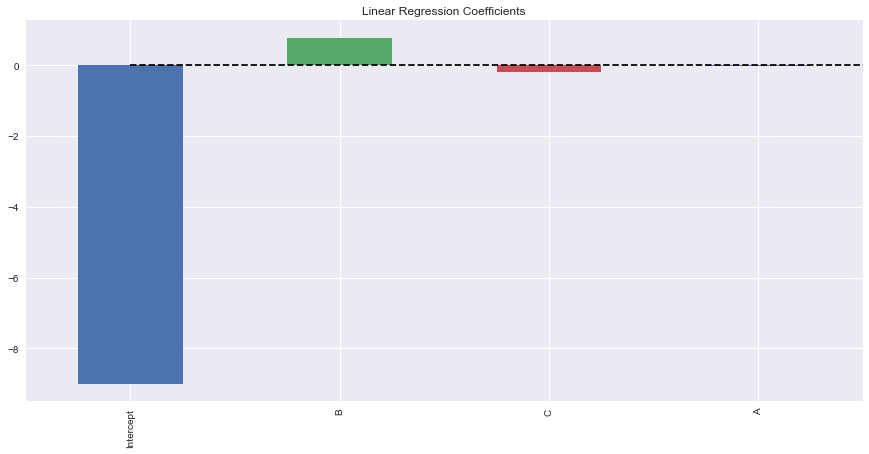

In [10]:
from linear_regression_utils import prep_data_OLS, fit_model_OLS, predict_OLS, plot_OLS_coeffs
from linear_regression_utils import tfuller_plot
from statsmodels.tsa.stattools import grangercausalitytests

test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
tuple_features = (['REF', 'GB_1W', 'STATION_CASE'],
                 ['A', 'CO_MICS_RAW', 'STATION_CASE'],
                 ['B', 'TEMP', 'STATION_CASE'],
                 ['C', 'HUM', 'STATION_CASE'],
                 ['D', 'PM_25', 'STATION_CASE'])

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

model_name = 'TEST_MODEL'
model_target = 'MICS' # ALPHASENSE, PMS, MICS...
model_type = 'OLS'
formula_expression = 'REF ~ A + B + C'

ratio_train = 3./4 # Important that this is a float, don't forget the .
model_full_name = '_'.join([model_target, model_type, model_name])

print ('Preparing devices from test {}'.format(test_model))
records.prepare_dataframe_model(tuple_features, test_model, min_date, max_date, 
                                      model_full_name, clean_na = True, clean_na_method = 'drop' , 
                                      target_raster = '1Min')

dataframeModel = records.readings[test_model]['models'][model_full_name]['data']

## Preliminary Check

# Fuller Plot for all
# for column in dataframeModel:
#     x = dataframeModel.loc[:,column]
#     tfuller_plot(x, name = x.name, lags=60, lags_diff = 5)
# Granger Causality
# print ('--------------------------------------')
# print ('Granger Causality Test')
## Granger Causality Test (WIP)
# for item in tuple_features:
#     if item[0] != 'REF':
#         print '\nCausality for x1 = {} and x2 = {}'.format(reference_name, item[1])
#         x = dataframeModel.loc[:,[reference_name, item[1]]].dropna()
#         x = x.values
#         granger_causality_tests = grangercausalitytests(x, 1)
#         # print granger_causality_tests

## Prepare Dataframe
dataTrain, dataTest, n_train_periods = prep_data_OLS(dataframeModel, 
                                                     tuple_features, 
                                                     ratio_train)
print (dataTrain.head())
print (dataTest.head())

## Model Fit
model = fit_model_OLS(formula_expression, dataTrain, printSummary = True)

plot_OLS_coeffs(model)

### Model prediction

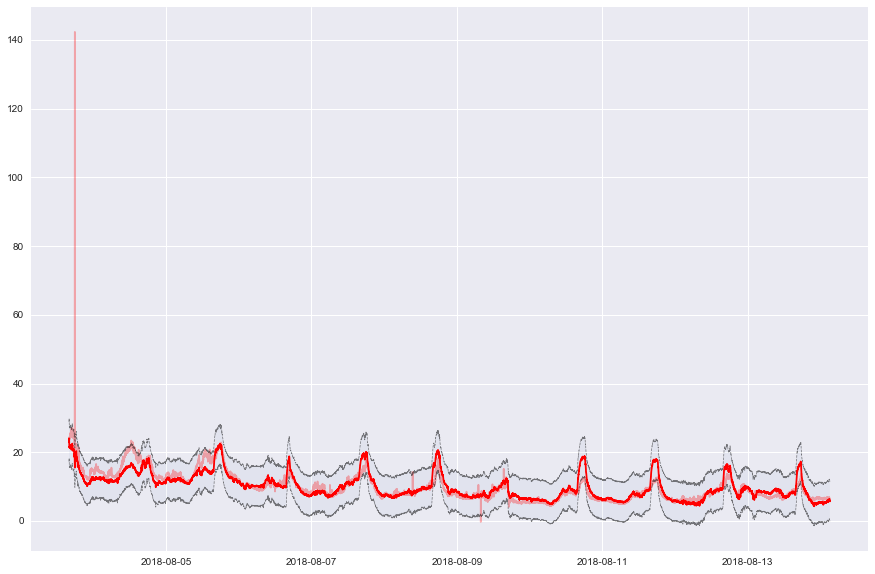

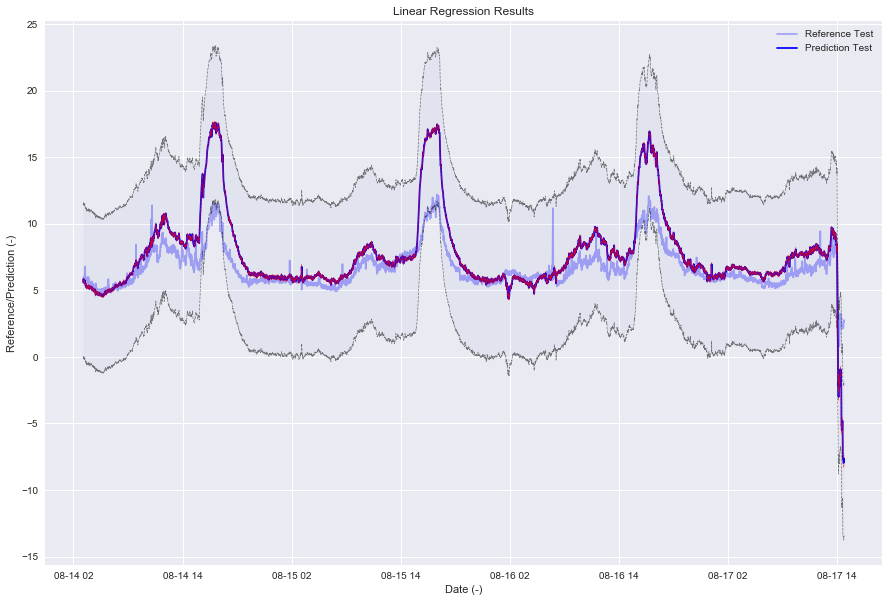

Model archived correctly
Metrics Summary:
Metric                  Train   Test 
avg_ref             	10.046	6.724
avg_est             	10.046	7.768
sig_ref             	4.703	1.502
sig_est             	3.667	3.030
bias                	-0.000	1.043
normalised_bias     	-0.000	0.695
sigma_norm          	0.780	2.017
sign_sigma          	-1.000	1.000
rsquared            	0.608	0.000
RMSD                	2.946	1.991
RMSD_norm_unb       	0.626	2.252


In [11]:
from linear_regression_utils import predict_OLS
from signal_utils import metrics
import pandas as pd
from tabulate import tabulate

## Predict the model results
dataFrameTrain = predict_OLS(model, dataTrain, True, False, 'train')
dataFrameTest = predict_OLS(model, dataTest, True, False, 'test')

## Combine them for export
dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get Metrics
metrics_model = dict()
metrics_model['train'] = metrics(dataFrameTrain['reference'], dataFrameTrain['prediction'])
metrics_model['test'] = metrics(dataFrameTest['reference'], dataFrameTest['prediction'])

records.archive_model(test_model, model_full_name, 
                      metrics_model, 
                      dataFrameExport, model, model_type, 
                      model_target, ratio_train, formula_expression)

print ('Metrics Summary:')
print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
for metric in metrics_model['train'].keys():
    print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))

### Diagnostics plots

Residuals:
	ADF- Statistic: -8.34521 	pvalue: 0.00000 	Used Lag:  41 	nobs:  15024 


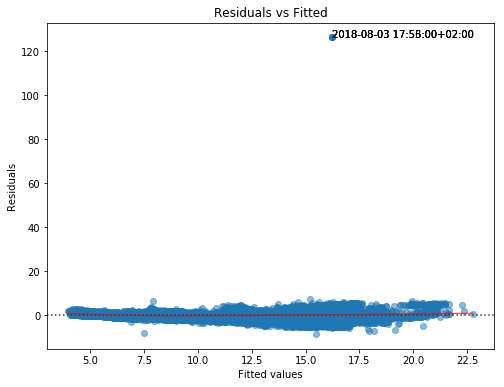

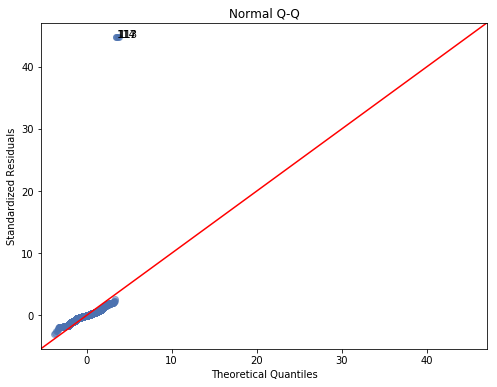

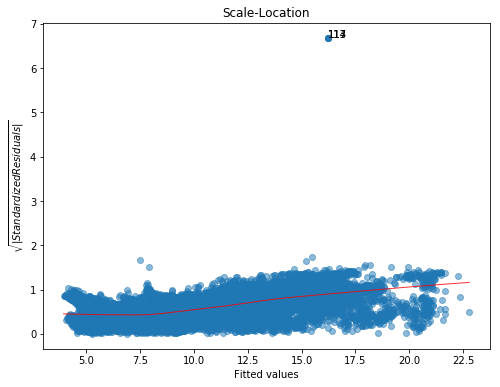

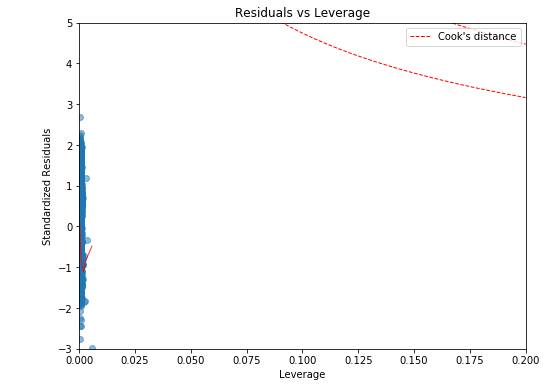

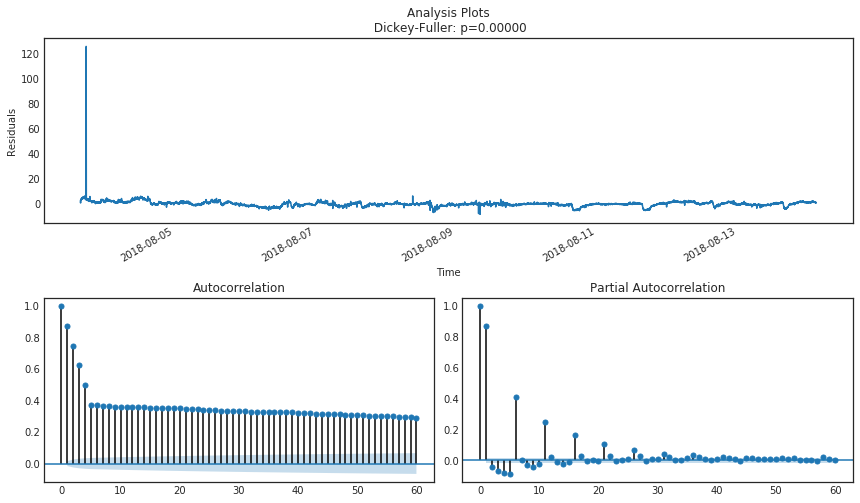

In [87]:
from linear_regression_utils import model_R_plots
%matplotlib inline

model_R_plots(model, dataTrain, dataTest)

## ML

### LSTM

#### Train-test split

In [ ]:
# Combine all data in one dataframe
#from ml_utils import prep_dataframe_ML

# Always have an item called 'REF', the rest can be anything
tuple_features = (['REF', 'CO_AD_BASE_1-60_FILTER'],
                 ['A', 'CO_MICS_RAW'],
                 ['B', 'TEMP'],
                 ['C', 'HUM'],
                 ['D', 'PM_25'])

device_name = 'STATION_CASE'
model_name_ML = 'LSTM CO - epochs = 100 - filter_alpha = 0.3 -  traintest = 0.8 - 3 lags'
modeltype = 'LSTM'

ratio_train = 4./5 # Important that this is a float, don't forget the .
alpha_filter = 0.3 # 1 means no filtering

# Number of lags for the model
n_lags = 1

## Prep Dataframe
dataframeModel = readings[test_model]['devices'][name_combined_data]['data']

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

dataframeModel = dataframeModel.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)

list_features = list()
for item in tuple_features: 
    if item[0] == 'REF':
        list_features.insert(0,item[1] + '_' + device_name)
        reference_name = item[1] + '_' + device_name
    else:
        list_features.append(item[1] + '_' + device_name)

# Data Split
index, train_X, train_y, test_X, test_y, scalerX, scalery, n_train_periods = prep_dataframe_MLA(dataframeModel, min_date, max_date, list_features, n_lags, ratio_train, alpha_filter, reference_name)

#### Model fit and prediction

In [ ]:
from ml_utils import fit_model_ML
from ml_utils import predict_ML, get_inverse_transform_ML
from signal_utils import metrics

# Model Fit
model = fit_model_ML('LSTM', train_X, train_y, 
                       test_X, test_y, 
                       epochs = 100, batch_size = 72, 
                       verbose = 2, plotResult = True, 
                       loss = 'mse', optimizer = 'adam')
 
# Get model prediction
inv_y_train = get_inverse_transform_ML(train_y, n_lags, scalery)
inv_yhat_train = predict_ML(model, train_X, n_lags, scalery)

inv_y_test = get_inverse_transform_ML(test_y, n_lags, scalery)
inv_yhat_test = predict_ML(model, test_X, n_lags, scalery)

dataFrameTrain = pd.DataFrame(data = {'reference': inv_y_train, 'prediction': inv_yhat_train}, 
                              index = index[:n_train_periods])
dataFrameTest = pd.DataFrame(data = {'reference': inv_y_test, 'prediction': inv_yhat_test}, 
                              index = index[n_train_periods+n_lags:])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

# Get model metrics
metrics_model_train = metrics(inv_y_train, inv_yhat_train)
metrics_model_test = metrics(inv_y_test, inv_yhat_test)

## Print Metrics
print('\t\t Train \t\t Test')
for item in metrics_model_train.keys():
    print ('% s: \t %.5f \t %.5f ' % (item, metrics_model_train[item], metrics_model_test[item]))

#### Model plots

In [ ]:
import matplotlib.pyplot as plot
%matplotlib inline

# Plot
fig = plot.figure(figsize=(15,10))
# Actual data
plot.plot(index[:n_train_periods], inv_y_train,'r', label = 'Reference Train', alpha = 0.3)
plot.plot(index[n_train_periods+n_lags:], inv_y_test, 'b', label = 'Reference Test', alpha = 0.3)
# Fitted Values for Training
plot.plot(index[:n_train_periods], inv_yhat_train, 'r', label = 'Prediction Train')

# Fitted Values for Test
plot.plot(index[n_train_periods+n_lags:], inv_yhat_test, 'b', label = 'Prediction Test')

plot.title('{} Regression Results'.format(modeltype) + model_name_ML)
plot.ylabel('Reference/Prediction (-)')
plot.xlabel('Date (-)')
plot.legend(loc='best')
plot.show()

### Random Forest Regressor or SVR

No feature scaling implementation

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from signal_utils import metrics
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split

test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
tuple_features = (['REF', 'GB_1W', 'STATION_CASE'],
                 ['A', 'CO_MICS_RAW', 'STATION_CASE'],
                 ['B', 'TEMP', 'STATION_CASE'],
                 ['C', 'HUM', 'STATION_CASE'],
                 ['D', 'PM_25', 'STATION_CASE'])

min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

model_name = 'TEST_MODEL'
model_target = 'MICS' # ALPHASENSE, PMS, MICS...
model_type = 'RF' # RF or SVR
ratio_train = 3./4 # Important that this is a float, don't forget the .
model_full_name = '_'.join([model_target, model_type, model_name])

print ('Preparing devices from test {}'.format(test_model))
records.prepare_dataframe_model(tuple_features, test_model, min_date, max_date, 
                                      model_full_name, clean_na = True, clean_na_method = 'drop' , 
                                      target_raster = '1Min')

dataframeModel = records.readings[test_model]['models'][model_full_name]['data']
reference_name = records.readings[test_model]['models'][model_full_name]['reference']

labels = dataframeModel[reference_name]
features = dataframeModel.drop(reference_name, axis = 1)

# List of features for later use
feature_list = list(features.columns)

features = np.array(features)
labels = np.array(labels)
# Training and Testing Sets
train_X, test_X, train_y, test_y = train_test_split(features, labels, random_state = 42, 
                                                    test_size = 1-ratio_train, shuffle = False)

n_train_periods = train_X.shape[0]
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)


Preparing devices from test 2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS

	Data combined successfully
	Dataframe model generated successfully
Training X Shape: (15066, 4)
Training y Shape: (15066,)
Testing X Shape: (5022, 4)
Testing y Shape: (5022,)


#### Model Fit

##### Single Model Fit

Using TensorFlow backend.


Model Performance
	Average Error: 0.0895.
	Accuracy = 99.09%.
Model Performance
	Average Error: 0.6741.
	Accuracy = 89.23%.
Model archived correctly
Metrics Summary:
Metric                  Train   Test 
avg_ref             	10.046	6.724
avg_est             	10.049	7.263
sig_ref             	4.703	1.502
sig_est             	4.693	1.551
bias                	0.002	0.539
normalised_bias     	0.000	0.359
sigma_norm          	0.998	1.032
sign_sigma          	-1.000	1.000
rsquared            	0.998	0.689
RMSD                	0.204	0.838
RMSD_norm_unb       	0.043	0.593


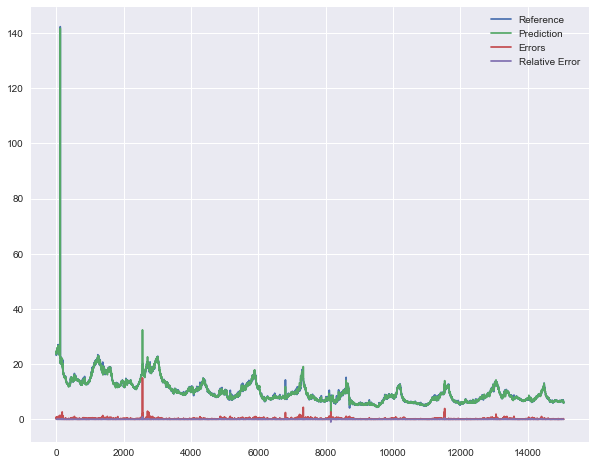

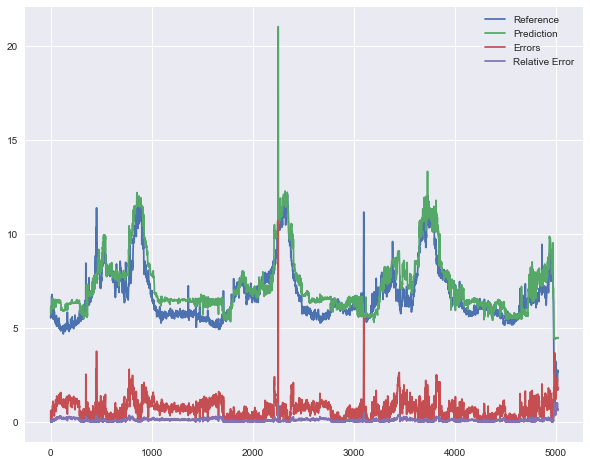

In [26]:
from ml_utils import predict_ML

# Instantiate model 
if model_type == 'RF':
    model = RandomForestRegressor(n_estimators= 1000, random_state = 42)
elif model_type == 'SVR':
    model = SVR(kernel='rbf')
    
## Train the model on training data
model.fit(train_X, train_y)

# Get Metrics
metrics_model = dict()
metrics_model['train'] = metrics(dataFrameTrain['reference'], dataFrameTrain['prediction'])
metrics_model['test'] = metrics(dataFrameTest['reference'], dataFrameTest['prediction'])

## Get model prediction
dataFrameTrain = predict_ML(model, features[:n_train_periods], labels[:n_train_periods], dataframeModel.index[:n_train_periods])
dataFrameTest = predict_ML(model, features[n_train_periods:], labels[n_train_periods:], dataframeModel.index[n_train_periods:])

dataFrameExport = dataFrameTrain.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest)

records.archive_model(test_model, model_full_name, 
                      metrics_model, 
                      dataFrameExport, model, model_type, 
                      model_target, ratio_train, formula_expression)

# Get model metrics
metrics_model = dict()
metrics_model['train'] = metrics(dataFrameTrain['reference'], dataFrameTrain['prediction'])
metrics_model['test'] = metrics(dataFrameTest['reference'], dataFrameTest['prediction'])

print ('Metrics Summary:')
print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
for metric in metrics_model['train'].keys():
    print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))

##### Random Search with Cross Validation 

We perform here cross validated random search of the model hyperparameters, to later on retrieve the best parameters with a grid search around the best found results of the CV.

Using **k-fold cross validation** below:

![](https://i.imgur.com/HLbgMSS.png)

Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Model Performance
	Average Error: 0.0895.
	Accuracy = 99.09%.
Model Performance
	Average Error: 0.6741.
	Accuracy = 89.23%.
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


KeyboardInterrupt: 

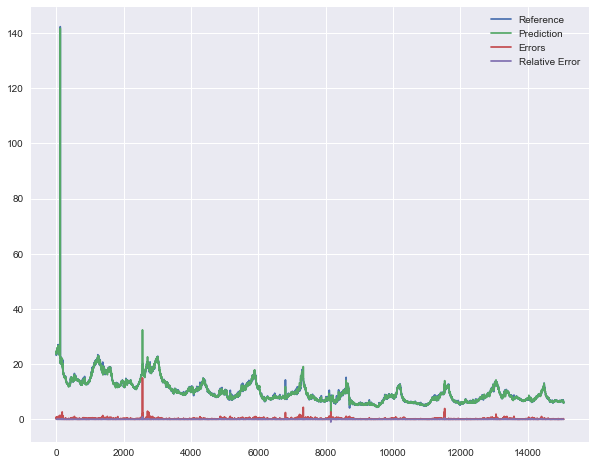

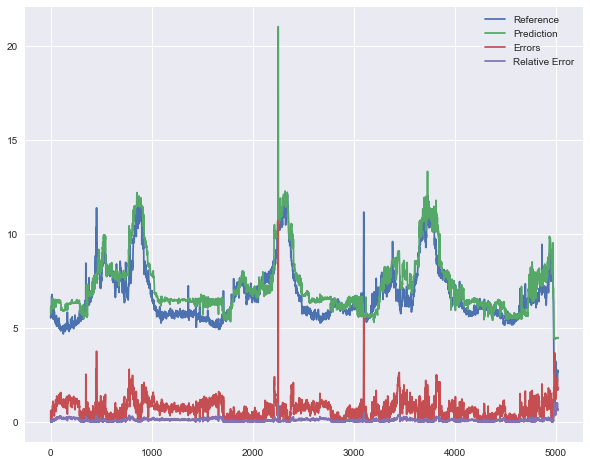

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from ml_utils import predict_ML

if model_type == 'RF':

    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    ## Evaluate the default model
    base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    random_model = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
elif model_type == 'SVR':
    
    
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    random_grid = {"C": [1e0, 1e1, 1e2, 1e3], 
                   "gamma": np.logspace(-2, 2, 5),
                   "kernel": ['rbf', 'sigmoid'],
                  "shrinking": [True, False]}
    
    ## Create the default model
    base_model = SVR(kernel='rbf', gamma=0.1)

    ## Create randomized Search
    random_model = RandomizedSearchCV(estimator = SVR(), cv=5, 
                             n_iter = 100, scoring = 'neg_mean_absolute_error',
                             param_distributions=random_grid,  verbose=2, random_state=42, n_jobs=-1)
    
# Fit the base model
base_model.fit(train_X, train_y)
## Get base model prediction
dataFrameTrain_base = predict_ML(base_model, features[:n_train_periods], labels[:n_train_periods], dataframeModel.index[:n_train_periods])
dataFrameTest_base = predict_ML(base_model, features[n_train_periods:], labels[n_train_periods:], dataframeModel.index[n_train_periods:])

# Fit the random search model
random_model.fit(train_X, train_y)
random_model.best_params_
best_random = random_model.best_estimator_
## Evaluate the best model
dataFrameTrain_best = predict_ML(best_random, features[:n_train_periods], labels[:n_train_periods], dataframeModel.index[:n_train_periods])
dataFrameTest_best = predict_ML(best_random, features[n_train_periods:], labels[n_train_periods:], dataframeModel.index[n_train_periods:])

Now perform the gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

if model_type == 'RF':
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [False],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [1, 2],
        'min_samples_split': [2, 3],
        'n_estimators': [200, 300, 400, 1000]
    }
        
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, 
                               scoring = 'neg_mean_absolute_error', cv = 3, 
                               n_jobs = -1, verbose = 2)
elif model_type == 'SVR':

    # Create the parameter grid based on the results of random search 
    param_grid = {"C": [1e0, 1e1, 1e2, 1e3], 
                   "gamma": np.logspace(-2, 2, 5),
                  "shrinking": [True, False]
    }

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = SVR(), param_grid = param_grid, 
                               scoring = 'neg_mean_absolute_error', cv = 3, 
                               n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_X, train_y)
# Fit the grid search to the data
grid_search.fit(train_X, train_y)

Get best grid estimator

In [ ]:
print (grid_search.best_params_)
best_grid = grid_search.best_estimator_
print (best_grid)
dataFrameTrain_best_grid = predict_ML(best_grid, features[:n_train_periods], labels[:n_train_periods], dataframeModel.index[:n_train_periods])
dataFrameTest_best_grid = predict_ML(best_grid, features[n_train_periods:], labels[n_train_periods:], dataframeModel.index[n_train_periods:])

If happy with the best predictions of the grid search, put them in the dataframe for plotting and archiving

In [ ]:
dataFrameExport = dataFrameTrain_best_grid.copy()
dataFrameExport = dataFrameExport.combine_first(dataFrameTest_best_grid)

# Get model metrics
metrics_model = dict()
metrics_model['train'] = metrics(dataFrameTrain_best_grid['reference'], dataFrameTrain_best_grid['prediction'])
metrics_model['test'] = metrics(dataFrameTest_best_grid['reference'], dataFrameTest_best_grid['prediction'])

records.archive_model(test_model, model_full_name + '_best_grid_search', 
                      metrics_model, 
                      dataFrameExport, best_grid, model_type, 
                      model_target, ratio_train)

print ('Metrics Summary:')
print ("{:<23} {:<7} {:<5}".format('Metric','Train','Test'))
for metric in metrics_model['train'].keys():
    print ("{:<20}".format(metric) +"\t" +"{:0.3f}".format(metrics_model['train'][metric]) +"\t"+ "{:0.3f}".format(metrics_model['test'][metric]))

#### Model plots

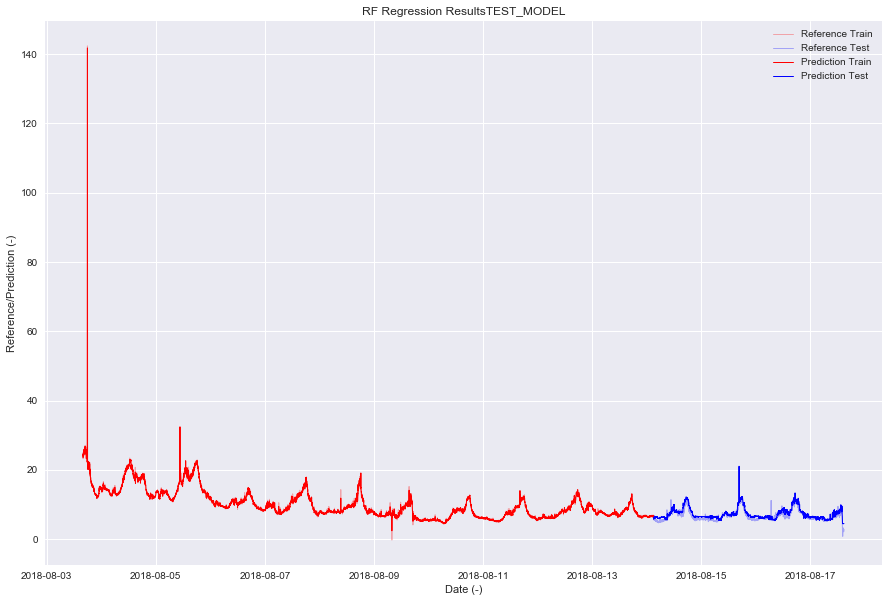

Variable: TEMP_STATION_CASE Importance: 0.59
Variable: HUM_STATION_CASE Importance: 0.17
Variable: CO_MICS_RAW_STATION_CASE Importance: 0.16
Variable: PM_25_STATION_CASE Importance: 0.08


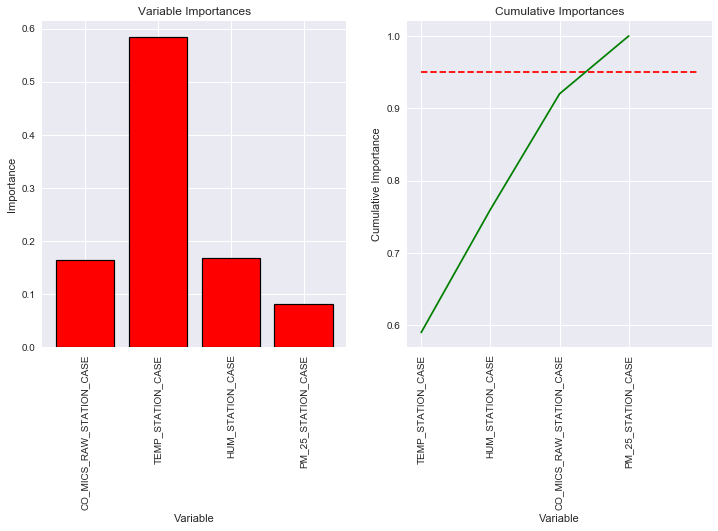

In [27]:
from ml_utils import plot_model_ML
%matplotlib inline

plot_model_ML(model, dataFrameTrain, dataFrameTest, feature_list, model_type, model_name)

### Model archiving

In [ ]:
## Put everything in the dict
dictModel = readings[test_model]['devices'][name_combined_data]

# From https://hackmd.io/Y62wiJw0RaiBfU4Xhv8dQQ#
dictModel[model_name_ML] = dict()
dictModel[model_name_ML]['metrics'] = dict()
dictModel[model_name_ML]['metrics']['train'] = metrics_model_train
dictModel[model_name_ML]['metrics']['test'] = metrics_model_test

# Model Parameters
dictModel[model_name_ML]['parameters'] = dict()
dictModel[model_name_ML]['parameters']['features'] = tuple_features
dictModel[model_name_ML]['parameters']['ratio_train'] = n_train_periods

if modeltype == 'LSTM':
    dictModel[model_name_ML]['parameters']['scalerX'] = scalerX
    dictModel[model_name_ML]['parameters']['scalery'] = scalery
    dictModel[model_name_ML]['parameters']['n_lags'] = n_lags
    dictModel[model_name_ML]['parameters']['alpha_filter'] = alpha_filter

dictModel[model_name_ML]['data'] = dict()
dictModel[model_name_ML]['data']['train'] = dataFrameTrain
dictModel[model_name_ML]['data']['test'] = dataFrameTest
dictModel[model_name_ML]['model'] = model
dictModel[model_name_ML]['modelType'] = modeltype

# Put it back in the readings dataframe
readings[test_model]['devices'][name_combined_data]['model'][model_name_ML] = dictModel[model_name_ML]
readings[test_model]['devices'][model_name_ML] = dict()
readings[test_model]['devices'][model_name_ML]['data'] = dataFrameExport

## Model Export to Disk

In [28]:
records.export_model(test_model, model_full_name, modelDirectory)

hola
Model: 
	MICS_RF_TEST_MODEL
Saved in:
	/Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-models/Models/MICS
Model included in summary


## Model Comparison

### TimeSeries Comparison

In [7]:
import matplotlib.pyplot as plt
import plotly.tools as tls
%matplotlib inline

fig = plt.figure(figsize=(15,10))
referencePlotted = False
        
for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:

            ratio_train = readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['ratio_train']

            data = readings[test_model]['devices'][model_name]['data']
                
            total_len = len(data.index)
            n_train_periods = int(round(total_len*ratio_train))
    
            dataframeTrain = data.iloc[:n_train_periods,:]
            dataframeTest = data.iloc[n_train_periods:,:]
                        
            if (not referencePlotted):
                plt.plot(dataframeTrain.index, dataframeTrain['reference'], 'b.', label = 'Reference Train', alpha = 0.3)
                plt.plot(dataframeTest.index, dataframeTest['reference'], 'b.', label = 'Reference Test', alpha = 0.3)
                referencePlotted = True
            
            plt.plot(dataframeTrain.index, dataframeTrain['prediction'], linewidth = 0.6, label = 'Prediction Train ' + model_name)
            plt.plot(dataframeTest.index, dataframeTest['prediction'], linewidth = 0.6, label = 'Prediction Test ' + model_name)

plt.legend(loc = 'best')
# plt.ylabel(str(readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['features']["ref"][1]))
plt.xlabel('Date (-)')
plt.grid()
# plt.title('Model Comparison for ' + str(readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['features']["ref"][1]))

NameError: name 'readings' is not defined

<Figure size 1080x720 with 0 Axes>

### Scatter Comparison

In [ ]:
import matplotlib.pyplot as plot
from matplotlib import gridspec
import math

number_of_subplots = 0
for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            number_of_subplots += 1
            

if number_of_subplots % 2 == 0: cols = 2
else: cols = 3
rows = int(math.ceil(number_of_subplots / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plot.figure(figsize=(15,10))

fig.tight_layout()
n = 0

for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            
            ratio_train = readings[test_model]['devices'][name_combined_data]['model'][model_name]['parameters']['ratio_train']

            data = readings[test_model]['devices'][model_name]['data']
            dataVal = data.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)    
            total_len = len(dataVal.index)
            n_train_periods = int(round(total_len*ratio_train))
    
            dataframeTrain = dataVal.iloc[:n_train_periods,:]
            dataframeTest = dataVal.iloc[n_train_periods:,:]

            ax = fig.add_subplot(gs[n])
            n += 1          
            plot.plot(dataframeTrain['reference'], dataframeTrain['prediction'], 'go', label = 'Train ' + model_name, alpha = 0.3)
            plot.plot(dataframeTest['reference'], dataframeTest['prediction'], 'bo', label = 'Test ' + model_name, alpha = 0.3)

            plot.plot(dataframeTrain['reference'], dataframeTrain['reference'], 'k', linewidth = 0.4, alpha = 0.3)

            plot.legend(loc = 'best')
            plot.ylabel('Prediction (-)')
            plot.xlabel('Reference (-)')

### Model Metrics Comparison

In [ ]:
from math import sqrt
import matplotlib.pyplot as plot
%matplotlib inline

for model in readings[test_model]['devices'][name_combined_data]['model']:
    print '-----------------------------------------------------'
    print '\nModel Name: {}'.format(model)
    print '\n\t\t Train \t\t Test'
    metrics_model = readings[test_model]['devices'][name_combined_data]['model'][model]['metrics']
    for item in metrics_model['train']:
        print ('% s: \t %.5f \t %.5f ' % (item, metrics_model['train'][item], metrics_model['test'][item]))

def minRtarget(targetR):
    return sqrt(1+ np.power(targetR,2)-2*np.power(targetR,2))

_plot_train = True
_dataframe = readings[test_model]['devices'][name_combined_data]

def targetDiagram(dataframe, plot_train):

    targetR20 = 0.5
    targetR0 = sqrt(targetR20)
    MR0 = minRtarget(targetR0)
    targetR21 = 0.7
    targetR1 = sqrt(targetR21)
    MR1 = minRtarget(targetR1)
    targetR22 = 0.9
    targetR2 = sqrt(targetR22)
    MR2 = minRtarget(targetR2)


    fig  = plot.figure(figsize=(13,13))
    for model in readings[test_model]['devices'][name_combined_data]['model']:
        metrics_model = dataframe[model]['metrics']
    
        if plot_train == True:
            plot.scatter(metrics_model['train']['sign_sigma']*metrics_model['train']['RMSD_norm_unb'], metrics_model['train']['normalised_bias'], label = 'Train ' + model)
        plot.scatter(metrics_model['test']['sign_sigma']*metrics_model['test']['RMSD_norm_unb'], metrics_model['test']['normalised_bias'], label = 'Test ' + model)
    
    ## Add circles
    ax = plot.gca()
    circle1 = plot.Circle((0, 0), 1, linewidth = 0.8, color='k', fill =False)
    circleMR0 = plot.Circle((0, 0), MR0, linewidth = 0.8, color='r', fill=False)
    circleMR1 = plot.Circle((0, 0), MR1, linewidth = 0.8, color='y', fill=False)
    circleMR2 = plot.Circle((0, 0), MR2, linewidth = 0.8, color='g', fill=False)
    
    circle3 = plot.Circle((0, 0), 0.01, color='k', fill=True)
    
    ## Add annotations
    ax.add_artist(circle1)
    ax.annotate('R2 < 0',
                xy=(1, 0), xycoords='data',
                xytext=(-35, 10), textcoords='offset points')
    
    ax.add_artist(circleMR0)
    ax.annotate('R2 < ' + str(targetR20),
                xy=(MR0, 0), xycoords='data',
                xytext=(-35, 10), textcoords='offset points', color = 'r')
    
    ax.add_artist(circleMR1)
    ax.annotate('R2 < ' + str(targetR21),
                xy=(MR1, 0), xycoords='data',
                xytext=(-45, 10), textcoords='offset points', color = 'y')
    
    
    ax.add_artist(circleMR2)
    ax.annotate('R2 < ' + str(targetR22),
                xy=(MR2, 0), xycoords='data',
                xytext=(-45, 10), textcoords='offset points', color = 'g')
    ax.add_artist(circle3)
    
    ## Display and others
    plt.axhline(0, color='black', linewidth = 0.5)
    plt.axvline(0, color='black', linewidth = 0.5)
    plot.legend(loc='best')
    plot.xlim([-1.1,1.1])
    plot.ylim([-1.1,1.1])
    plot.title('Target Diagram')
    plot.ylabel('Normalised Bias (-)')
    plot.xlabel("RMSD*'")
    plot.show()
    

targetDiagram(_dataframe, _plot_train)

## Model Evaluation

### Data Quality Objectives
Explained here http://dx.doi.org/10.1016/j.envint.2016.12.007

Sensor values Y, reference values x

In [ ]:
test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            print '\t' + model_name

In [ ]:
from scipy.stats.stats import linregress
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline

def fUEREL(ux, values_x, values_Y):
    def RSS(values_x, values_Y, intercept, slope):
        pre_sum_1 = np.power(values_Y - intercept - np.multiply(slope, values_x), 2)
        # pre_sum_2 = np.power(values_Y / (intercept + np.multiply(slope, values_x)) - 1, 2)
        
        # fig, axes = plot.subplots(1, 2, figsize=(15,10))
        # axes[0].plot(pre_sum_1)
        # axes[1].plot(pre_sum_2)

        RSS = np.sum(np.power(pre_sum_1,2))
        
        return RSS
    
    slope, intercept, _, _, _ = linregress(values_x, values_Y)
    # fig = plot.figure(figsize=(15,10))
    # plot.plot(slope*values_x + intercept, label='Sensor')
    # plot.plot(values_Y)
    
    RSS = RSS(values_x, values_Y, intercept, slope)
    n = len(values_x)
    if len(values_Y) != n: return
    A = RSS/(n-2)-np.power(ux,2)
    B = np.power(intercept + (slope-1)*values_x, 2)
    C = np.power(A + B, 0.5)
    UEREL = np.divide(2*C, values_Y)
    
    return UEREL

In [ ]:
import matplotlib.pyplot as plot
from matplotlib import gridspec
import math

dqo_table = (['PM', 50],
            ['O3', 30],
            ['CO',25],
            ['NO',25],
            ['NO2',25],
            ['NOX',25],
            ['SO2',25])

ux = 0
test_model = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'

## ---

number_of_subplots = 0
for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
            number_of_subplots += 1

if number_of_subplots % 2 == 0: cols = 2
else: cols = 3
    
rows = int(math.ceil(number_of_subplots / cols))
gs = gridspec.GridSpec(rows, cols)
fig = plot.figure(figsize=(15,10))

fig.tight_layout()
n = 0

for device in readings[test_model]['devices']:
    if 'model' in readings[test_model]['devices'][device]:
        for model_name in readings[test_model]['devices'][device]['model']:
                        
            data = readings[test_model]['devices'][model_name]['data']
            dataVal = data.groupby(pd.Grouper(freq='1H')).aggregate(np.mean)
            values_x = dataVal['reference'].values
            values_Y = dataVal['prediction'].values
            
            total_len = len(data.index)
            n_train_periods = int(round(total_len*ratio_train))

            ax = fig.add_subplot(gs[n])
            n += 1      

            uerel = 100*fUEREL(ux, values_x, values_Y)
            
            plot.plot(values_x, uerel, 'ko')
            plot.xlabel('Ref. conc [ppb]')
            plot.ylabel('Rel. Exp. Unc (%)')
            plot.ylim([0, 100])
            plot.title(model_name)
            plot.axhline(y=25, color='r', linestyle='-')
            

### Match Score

# Data Model Load

## Import Model

In [ ]:
from os.path import join
from sklearn.externals import joblib
from keras.models import model_from_json
import json
from IPython.display import display
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

modelDir = join(rootDirectory, 'smartcitizen-iscape-models/Models/')

dict_models = dict()
with open(join(modelDir, 'summary.json'), 'r') as summary_file:
    dict_models = json.load(summary_file)
    
selectedModels = tuple()
def selectModels(Source):
    global selectedModels
    selectedModels = list(Source)
    
def loadModel(b):
    clear_output()
    if len(selectedModels)>0:
        filename = join(modelDir, target_drop.value, selectedModels[0])
        
        global loaded_model
        global loaded_params
        global loaded_metrics

        if type_drop.value == "LSTM":
            # ML Model
            # Load Model and weights
            json_file = open(filename + "_model.json", "r")
            loaded_model_json = json_file.read()
            json_file.close()
        
            loaded_model = model_from_json(loaded_model_json)
            loaded_model.load_weights(filename + "_model.h5")
        elif type_drop.value == "OLS":
            # OLS Model
            loaded_model = joblib.load(filename + '_model.sav')
        elif type_drop.value == 'RandomForest':
            loaded_model = joblib.load(filename + '_model.sav')
            
        # Load params and metrics
        loaded_params = joblib.load(filename + '_parameters.sav')
        loaded_metrics = joblib.load(filename + '_metrics.sav')
        
        display(Markdown('## Model Load'))
        display(Markdown("Loaded " + selectedModels[0] + " from disk"))
        display(Markdown('**Model Type** (*loaded_model*):' ))
        display(loaded_model)
        display(Markdown('**Model Parameters** (*loaded_params*)'))
        display(loaded_params)
        display(Markdown('**Model Metrics** (*loaded_metrics*)'))
        display(loaded_metrics)
    else:
        print 'Select one model to load'
    
def show_models(target, mtype):
    list_models = list()
    for item in dict_models[target]:
        if dict_models[target][item] == mtype:
            list_models.append(item)
    models.options = list(list_models)

display(widgets.HTML('<hr><h4>Import Local Models</h4>'))

type_drop = widgets.Dropdown(options = ['LSTM', 'RandomForest', 'OLS'],
                                  value = 'LSTM',
                                  description = 'Model Type',
                                  layout = widgets.Layout(width='300px'))

target_drop = widgets.Dropdown(options = ['ALPHASENSE', 'MICS', 'PMS'],
                                  value = 'MICS',
                                  description = 'Model Target',
                                  layout = widgets.Layout(width='300px'))

model_type_drop = widgets.interactive(show_models, 
                                target=target_drop,
                                mtype = type_drop, 
                                layout=widgets.Layout(width='700px'))

models = widgets.SelectMultiple(selected_labels = selectedModels, 
                           layout=widgets.Layout(width='700px'))

models_interact = widgets.interactive(selectModels,
                                     Source = models,
                                     layout = widgets.Layout(width='700px'))
display(model_type_drop)
display(models)

loadB = widgets.Button(description='Load Model')
loadB.on_click(loadModel)

buttonBox = widgets.HBox([loadB])
display(buttonBox)

## Apply OLS Model

In [ ]:
from linear_regression_utils import predict_OLS, prep_data_OLS
import matplotlib.pyplot as plot

# ---

# Input
test_name = '2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS'
device_name = 'STATION CHIMNEY'
prediction_name = 'CO_MICS_ppm'
min_date = '2018-08-01 00:00:00'
max_date = '2018-09-20 00:00:00'

# ---

# Retrieve model
model_predict = loaded_model
tuple_feat_predict = loaded_params['features']['items']
alpha_filter = loaded_params['alpha_filter']

## Prep Dataframe

list_features = list()
for item in tuple_feat_predict:
    list_features.append(item[1])
    if item[1] not in readings[test_name]['devices'][device_name]['data'].columns:
        print '{} not in {}'.format(item[1], test_name)
        break

dataframeModel = readings[test_name]['devices'][device_name]['data'].loc[:,list_features]
dataframeModel = dataframeModel.dropna()
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]
dataframeModel.dropna()

## Predict the model results
datapredict = prep_data_OLS(dataframeModel, tuple_feat_predict, 1, alpha_filter, device_name)

prediction = predict_OLS(model_predict, datapredict, False, False, 'test')

dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(datapredict['index'])
readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]

# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available from model training'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g')
# plot.ylim([0,1.5])
plot.grid(True)
plot.xlabel('Time')
plot.ylabel('Model' + prediction_name)
plot.show()

## Apply ML Model

In [ ]:
# ---

# Input
test_name = '2018-11_EXT_SALEM_TEST'
device_name = 'Miltown'
prediction_name = 'NO2_MICS_ppm'
min_date = '2018-01-01 00:00:00'
max_date = '2018-12-20 00:00:00'

# Temporary
readings[test_name]['devices'][device_name]['data']['NO2_MICS_RAW'] = readings[test_name]['devices'][device_name]['data']['NO2_MICS_RAW']*readings['2018-08_INT_STATION_TEST_SUMMER_HOLIDAYS']['devices']['STATION_CASE']['data']['NO2_MICS_RAW'].mean()/readings[test_name]['devices'][device_name]['data']['NO2_MICS_RAW'].mean()

# ---

model_predict = loaded_model
tuple_feat_predict = loaded_params['features'] 
print tuple_feat_predict

if type_drop.value == 'LSTM':
    scalerX_predict = loaded_params['scalerX']
    scalery_predict = loaded_params['scalery']
    n_lags = loaded_params['n_lags']
    alpha_filter = loaded_params['alpha_filter']
    
n_train_periods = loaded_params['ratio_train']

## Prep Dataframe
dataframeModel = readings[test_name]['devices'][device_name]['data']
dataframeModel = dataframeModel[dataframeModel.index > min_date]
dataframeModel = dataframeModel[dataframeModel.index < max_date]

list_features_predict = list()
for item in tuple_feat_predict: 
    if item[0] != 'REF':
        list_features_predict.append(item[1])

### LSTM

In [ ]:
from ml_utils import prep_prediction_ML
from ml_utils import predict_ML
import matplotlib.pyplot as plot
%matplotlib inline

test_X, index_pred, n_obs = prep_prediction_ML(dataframeModel, list_features_predict, n_lags, alpha_filter, scalerX_predict, verbose = True)
prediction = predict_ML(model_predict, test_X, n_lags, scalery_predict)
dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(index_pred)
readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]

# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available from model training'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g')
plot.ylim([0,1.5])
plot.grid(True)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plot
% matplotlib inline

# dataframeModel = dataframeModel.groupby(pd.Grouper(freq='90S')).aggregate(np.mean)
dataframeModel = dataframeModel.loc[:, list_features_predict]
dataframeModel = dataframeModel.dropna()
index_pred = dataframeModel.index

features = np.array(dataframeModel)

## Get model prediction
prediction = model_predict.predict(features)

dataframe = pd.DataFrame(prediction, columns = [prediction_name]).set_index(index_pred)
# dataframe = dataframe.groupby(pd.Grouper(freq='10Min')).aggregate(np.mean)    

readings[test_name]['devices'][device_name]['data'][prediction_name] = dataframe.loc[:,prediction_name]
# print readings[test_name]['devices'][device_name]['data'][prediction_name]
# Plot
fig = plot.figure(figsize=(15,10))

# Actual data
try:
    plot.plot(dataFrameTrain.index, dataFrameTrain['reference'],'r', label = 'Reference Train', alpha = 0.3)
    plot.plot(dataFrameTest.index, dataFrameTest['reference'], 'b', label = 'Reference Test', alpha = 0.3)
    # Fitted Values for Training
    plot.plot(dataFrameTrain.index, dataFrameTrain['prediction'], 'r', label = 'Prediction Train')
    # Fitted Values for Test
    plot.plot(dataFrameTest.index, dataFrameTest['prediction'], 'b', label = 'Prediction Test')
except:
    print 'No data available from model training'
    
# Fitted values
plot.plot(dataframe.index, dataframe.loc[:, prediction_name], 'g', label = 'Predicted value')
# plot.xlim(['2018-11-01','2018-11-20'])
plot.grid(True)
plot.legend(loc='best')